<a href="https://colab.research.google.com/github/subhabrata-ghosh-1988/credit-card-fraud-detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.

**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.**

#### In order to complete the project, we are going to follow below high level steps to build and select best model.

 - Read the dataset and perform exploratory data analysis
 - Building different classification models on the unbalanced data
 - Building different models on 3 different balancing technique.
      - Random Oversampling
      - SMOTE
      - ADASYN

   


In [ ]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV



In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download data from Kaggle and store it to the google drive 

! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
! mkdir ~/.kaggle
! cp /content/drive/'My Drive'/'Credit Card Fraud Assignment'/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Mounted at /content/drive
mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: creditcard.csv          


## Exploratory data analysis

### **Data understanding**

Data Source : https://www.kaggle.com/mlg-ulb/creditcardfraud


The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set.

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [ ]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Handling Missing values

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We can see that there is no missing value present in the dataframe.**

#### Outlier Treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

#### Correlation 

In [ ]:
# Finding the initial full correlation in the dataset:
# correlation matrix
cor = df.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

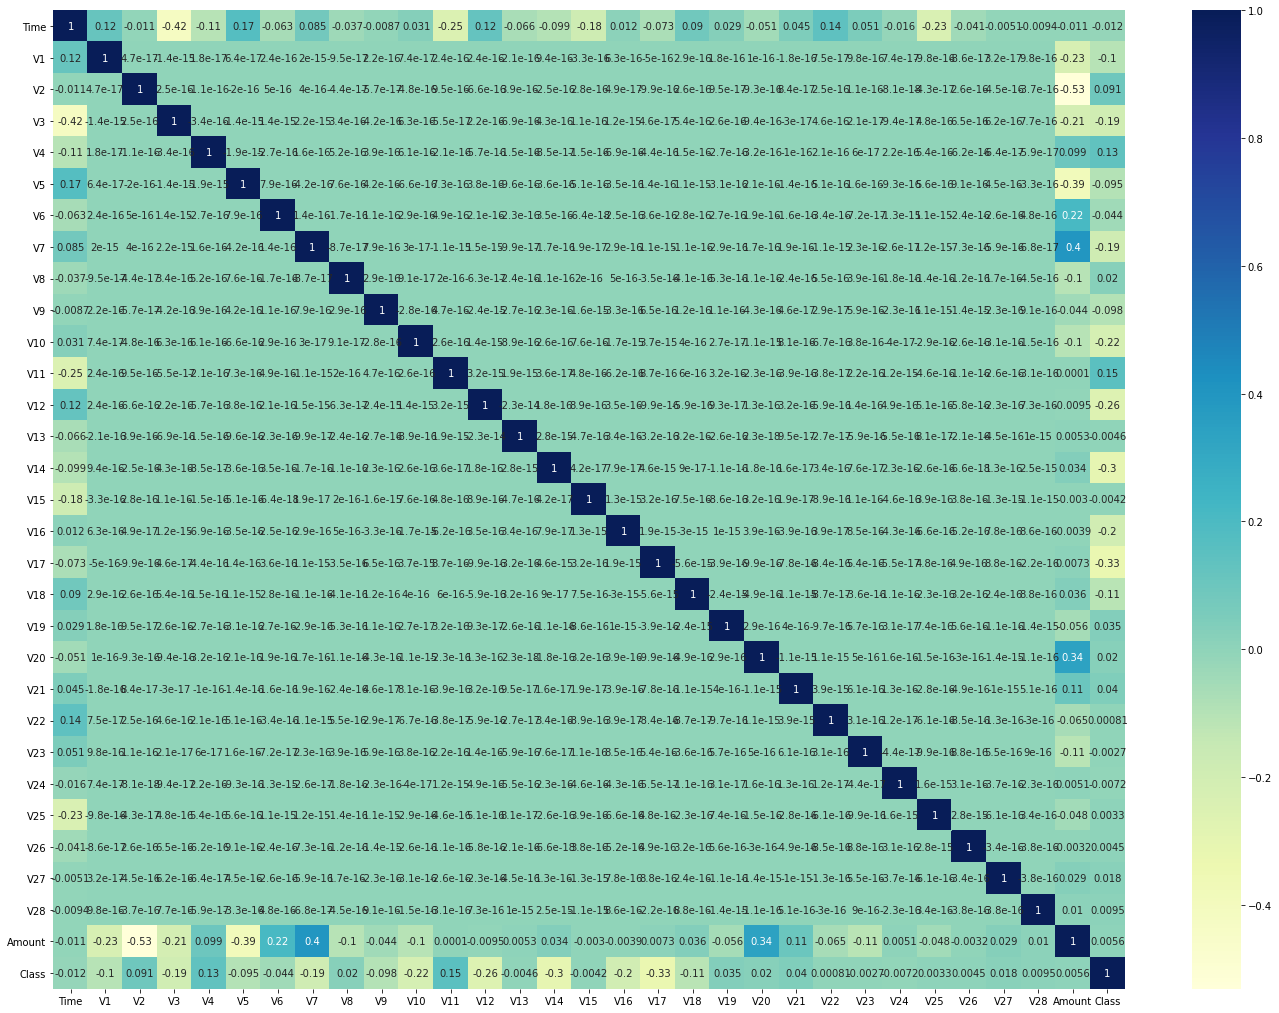

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

**We do not see any high correlation present in the dataset**

### Observe the distribution of our classes

---



In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

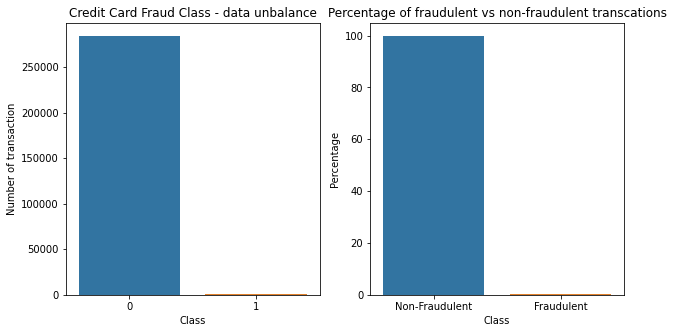

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()


#### Observation

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.


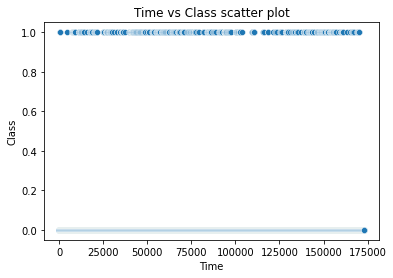

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

#### Observation

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time

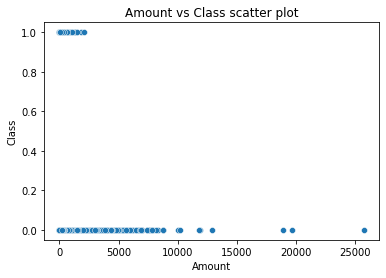

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#### Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

Dropping Time column as this feature is not going to help in the model building.


In [ ]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### Plotting the distribution of all features


<Figure size 432x288 with 0 Axes>

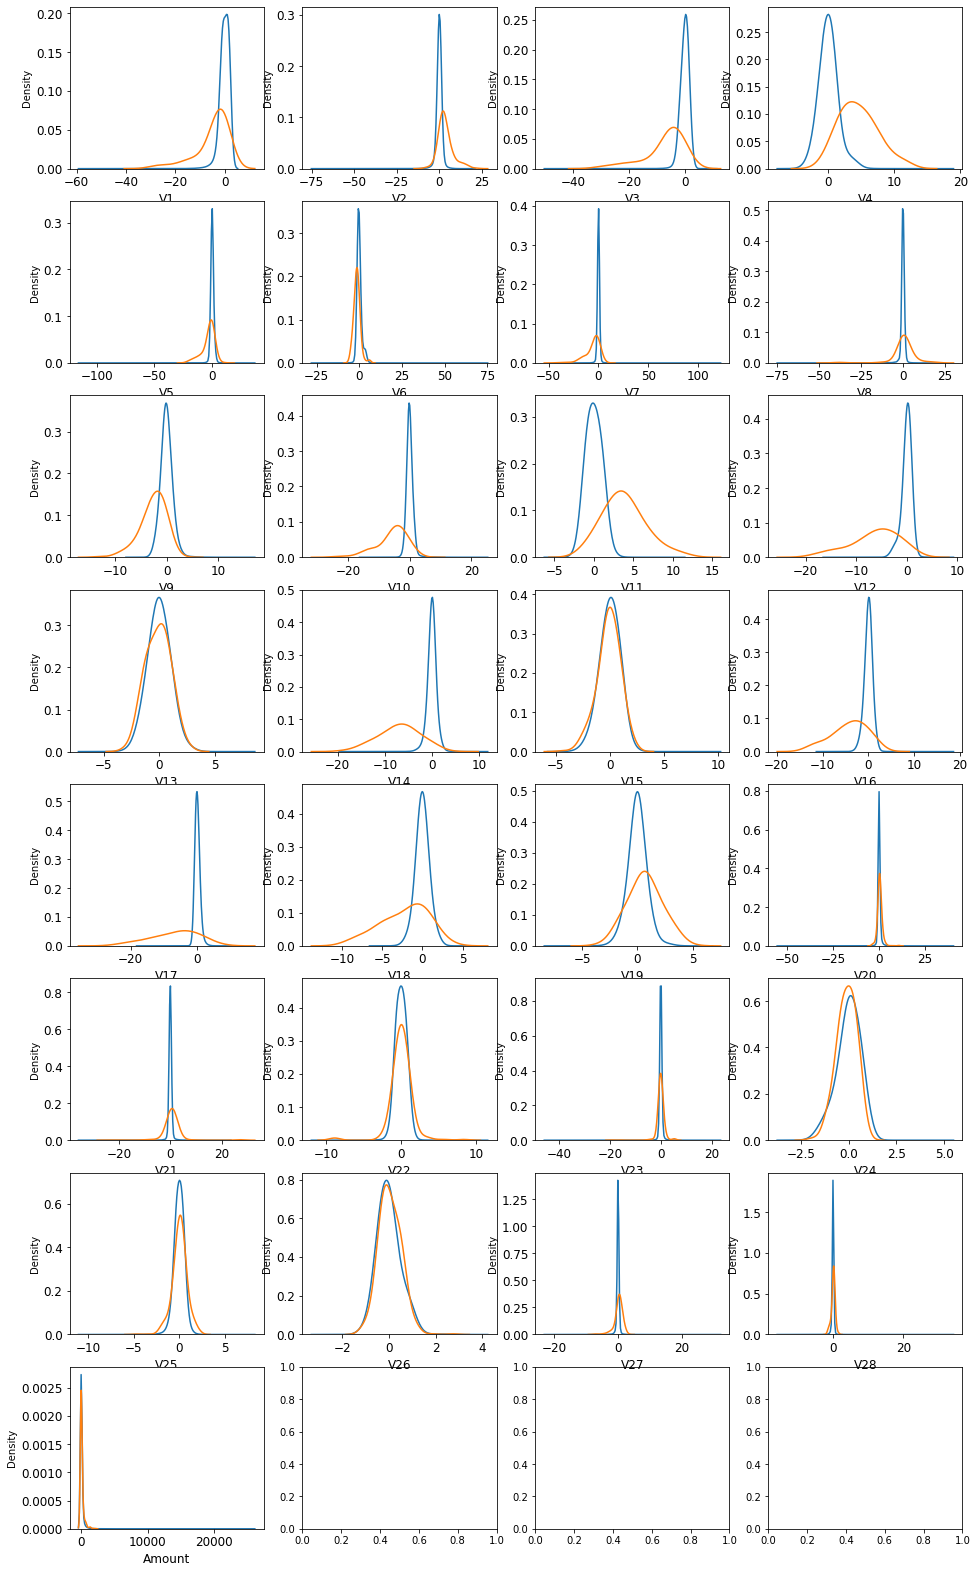

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### Observation

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [ ]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


#### Feature Scaling using Standard Scaler

We need to scale **Amount** column.

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plotting the distribution of a variable

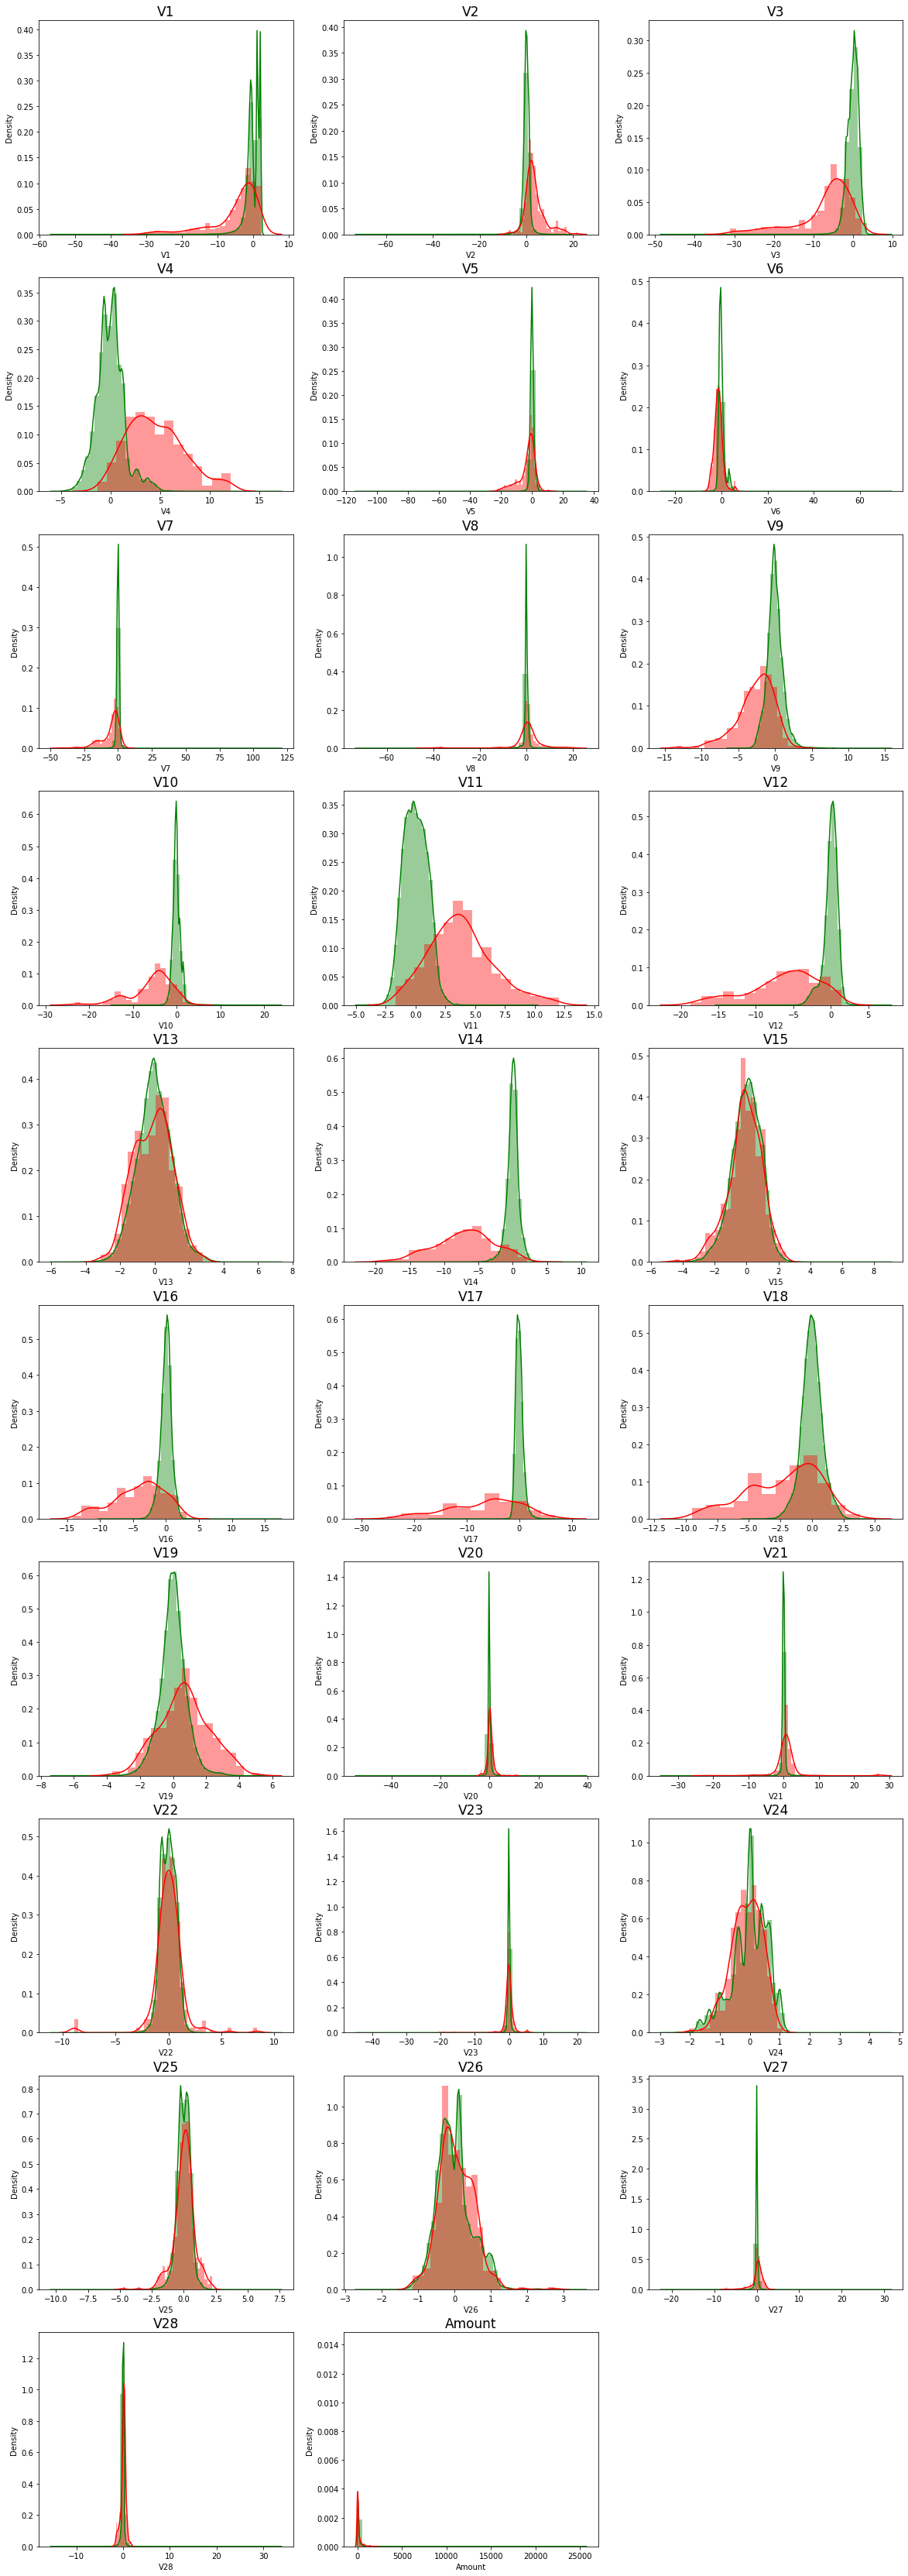

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()



Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [ ]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [ ]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

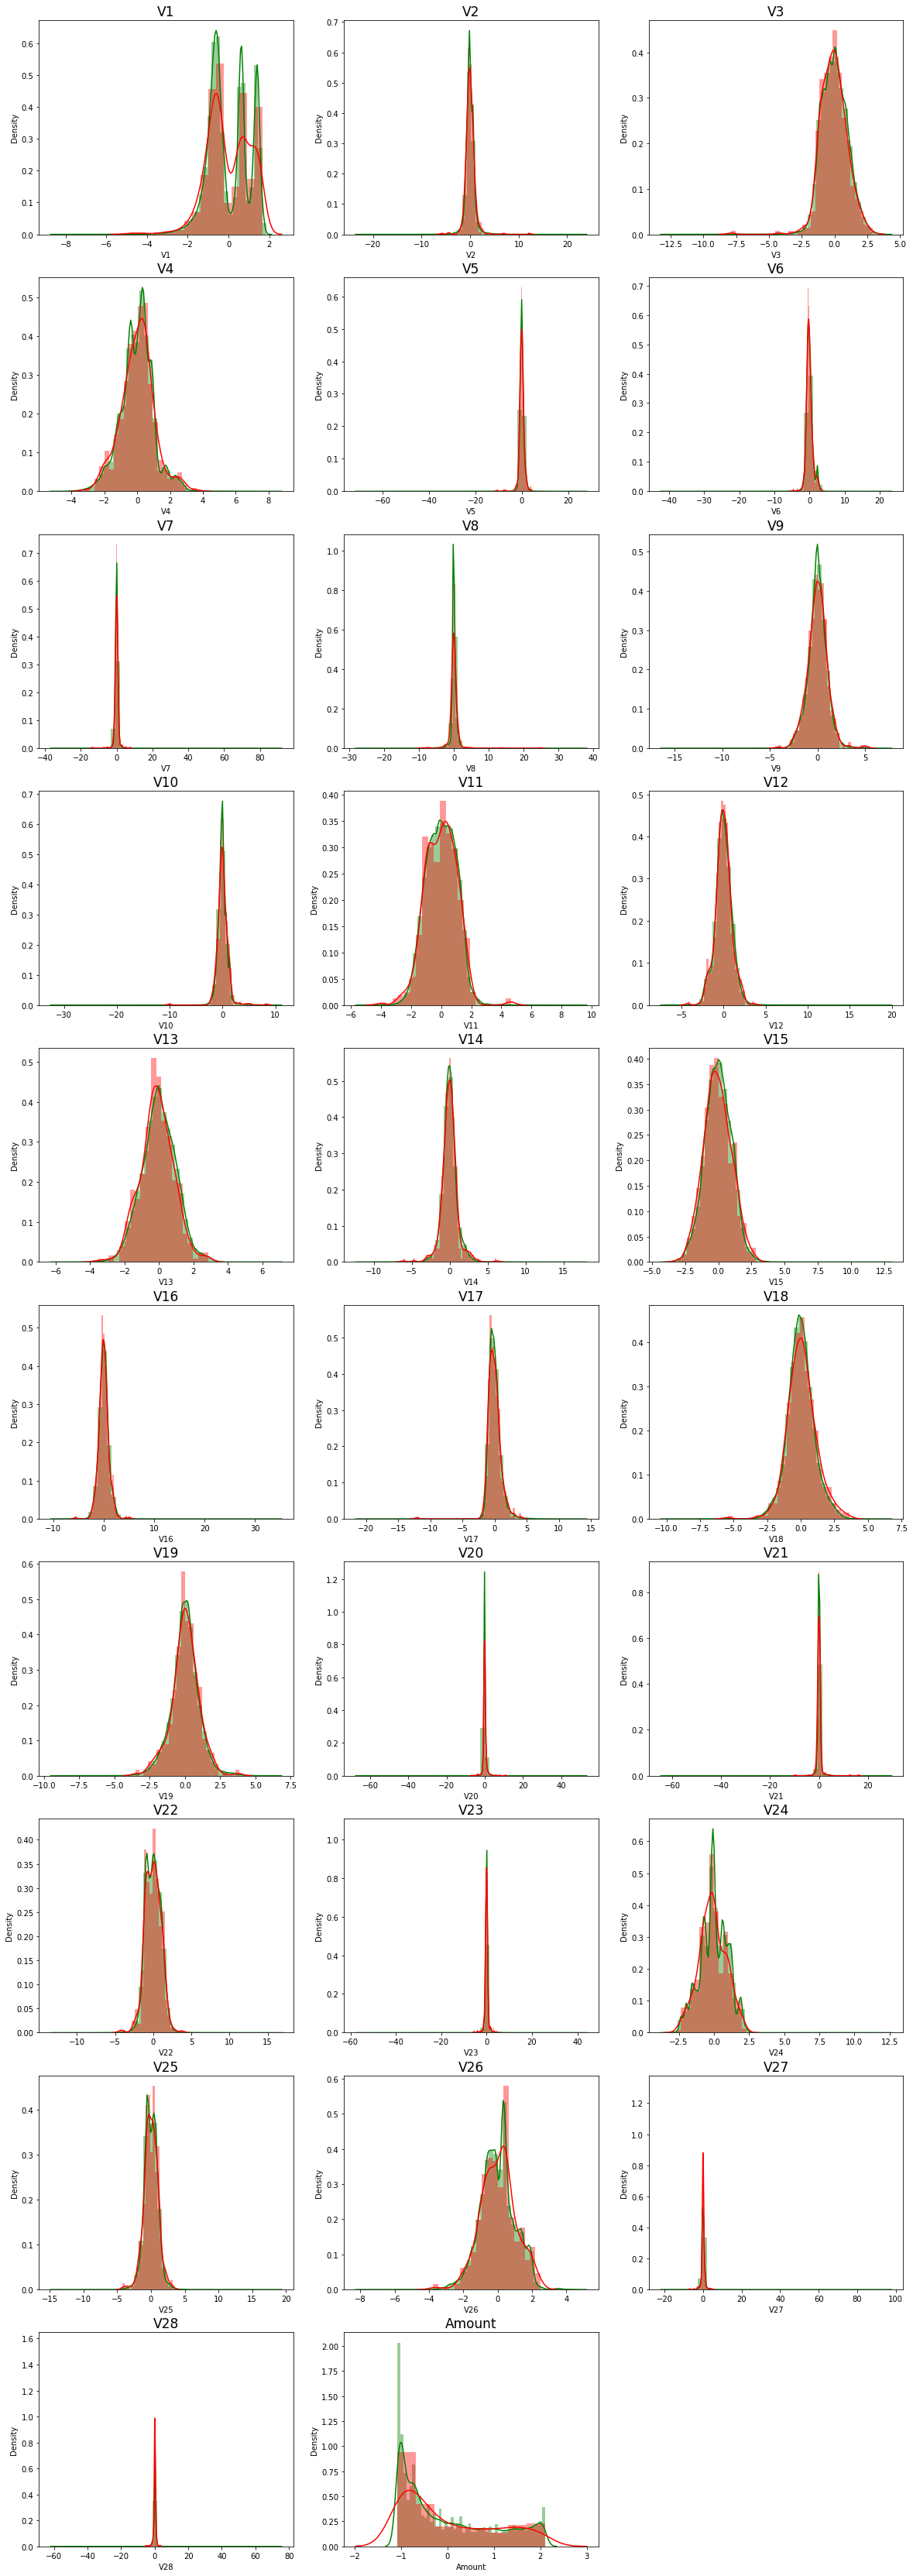

In [ ]:
 # plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [ ]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results



In [ ]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9794879964859963
Max auc_roc for l1: 0.9814027321094484
Parameters for l2 regularisations
[[-0.11439532 -0.0475338  -0.24358891  0.56006694  0.0498076   0.02517759
  -0.11961376 -0.21469041 -0.1519394  -0.19027838  0.16358934 -0.47192041
  -0.08815885 -0.65959294 -0.06673432 -0.2008596  -0.03434218  0.037968
  -0.0633958  -0.03682486  0.11479535  0.14027234 -0.08170062 -0.00945188
  -0.00769197  0.0047052  -0.08016455 -0.05007484  0.06627779]]
[-8.04118424]
{1: array([[0.92408917, 0.92402763, 0.92402763, 0.92402763, 0.92402889,
        0.92451994, 0.98055636, 0.99465495, 0.99672339, 0.99723454,
        0.99723454, 0.99715667, 0.99715667, 0.99715667, 0.99715667,
        0.99715667, 0.99715667, 0.99715667, 0.99715667, 0.99715667],
       [0.83724338, 0.83724338, 0.83724338, 0.83724338, 0.83724489,
        0.83754341, 0.91418254, 0.95569338, 0.9605106 , 0.95889375,
        0.95889375, 0.95889375, 0.95889375, 0.9588937

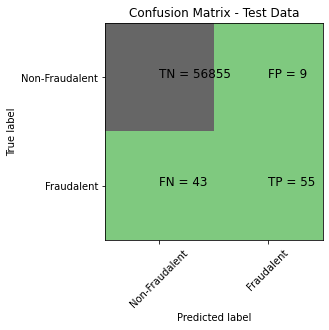

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9991222218320986
Confusion Matrix


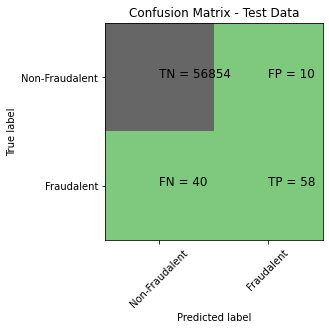

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9808269713343976
l2 threshold: 0.0031157096652854304
ROC for the test dataset 98.1%


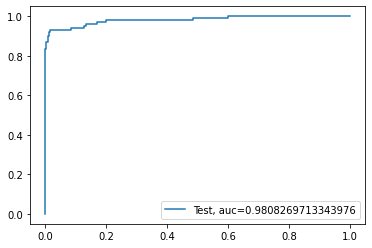

l1 roc_value: 0.9803652538674446
l1 threshold: 0.00952105663595141
ROC for the test dataset 98.0%


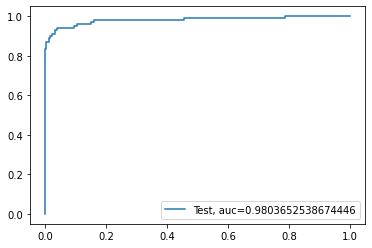

Time Taken by Model: --- 121.58908152580261 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9995435553526912
Confusion Matrix


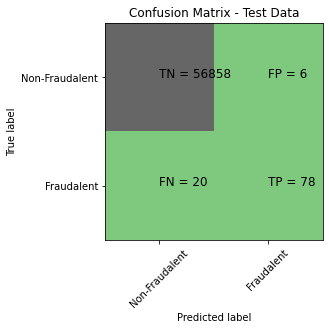

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9386542936673824
KNN threshold: 0.2
ROC for the test dataset 93.9%


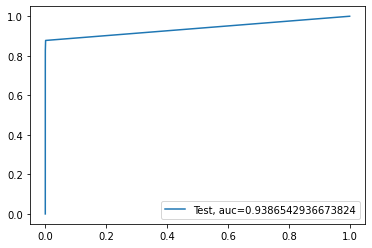

Time Taken by Model: --- 815.617075920105 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990695551420246
Confusion Matrix


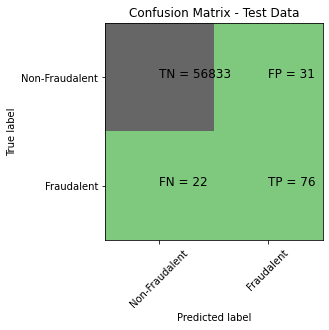

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8874825218494826
Tree threshold: 1.0
ROC for the test dataset 88.7%


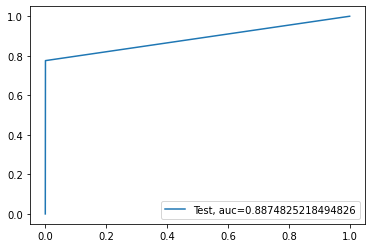

entropy score: 0.9992099996488887
Confusion Matrix


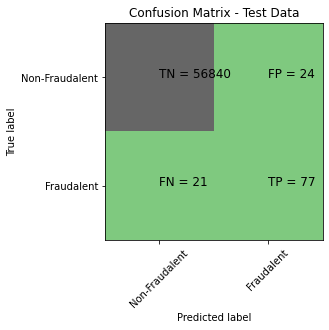

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8926461130315941
Tree threshold: 1.0
ROC for the test dataset 89.3%


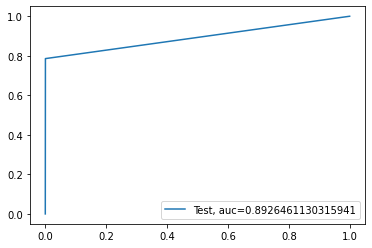

Time Taken by Model: --- 28.175811767578125 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995786664794073
Confusion Matrix


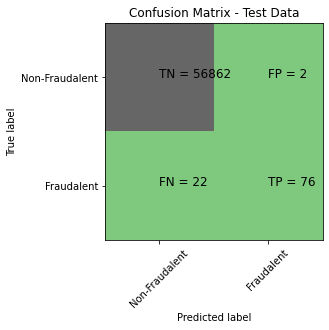

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9526079230932666
Random Forest threshold: 0.01
ROC for the test dataset 95.3%


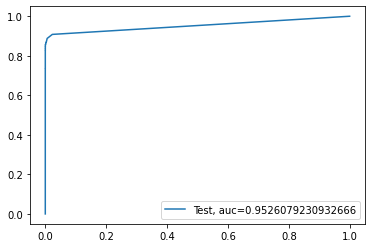

Time Taken by Model: --- 176.72091245651245 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995786664794073
Confusion Matrix


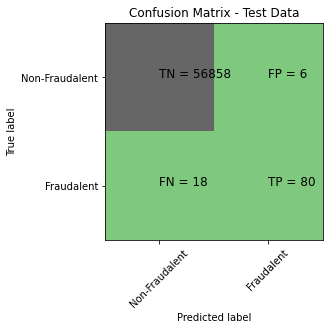

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.974715989026449
XGBoost threshold: 0.0015827675815671682
ROC for the test dataset 97.5%


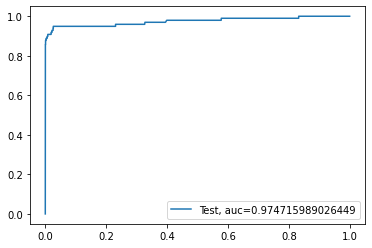

Time Taken by Model: --- 44.870973110198975 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9987711105649381
Confusion Matrix


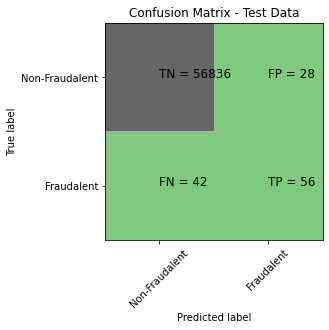

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.57      0.62        98

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8535444935571304
SVM threshold: 0.00030580691515969715
ROC for the test dataset 85.4%


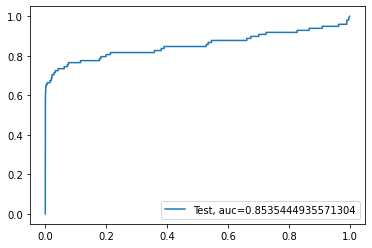

Time Taken by Model: --- 74.48485207557678 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results.head()

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000


## Perform cross validation with RepeatedKFold

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     39     43 ... 284786 284796 284800]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     11     12 ... 284790 284794 284801]
TRAIN: [     0      1      2 ... 284802 284805 284806] TEST: [    19     24     27 ... 284793 284803 284804]
TRAIN: [     0      3      4 ... 284803 284804 284805] TEST: [     1      2      5 ... 284795 284799 284806]
TRAIN: [     1      2      3 ... 284803 284804 284806] TEST: [     0      4      8 ... 284798 284802 284805]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST: [     7      9     10 ... 284799 284805 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      8     13 ... 284792 284794 284800]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     4     11     14 ... 284797 284802 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     12     16 ... 284790 284793 284801]
TRAIN: [     2     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9825041176403557
Max auc_roc for l1: 0.978579928343233
Parameters for l2 regularisations
[[-0.00081972  0.05020446 -0.08020156  0.23781455  0.08950127 -0.04628192
  -0.04184917 -0.12113026 -0.08548632 -0.17105674  0.13324776 -0.19048464
  -0.04124937 -0.36962056 -0.00512001 -0.10882698 -0.09304738 -0.00681946
   0.00444228 -0.01412165  0.04633458  0.02844593 -0.01014818 -0.01366506
  -0.00933635  0.00889143 -0.00963338  0.00039946  0.00037754]]
[-7.4398155]
{1: array([[0.61818648, 0.61945506, 0.63757562, 0.77044166, 0.92595474,
        0.96799971, 0.97608877, 0.98234967, 0.98967113, 0.99067751,
        0.98984692, 0.98984692, 0.98984692, 0.98984692, 0.98984692,
        0.98984692, 0.98984692, 0.98984692, 0.98984692, 0.98984692],
       [0.52446805, 0.52551357, 0.53706634, 0.63003452, 0.82600264,
        0.93774107, 0.97348485, 0.9756758 , 0.97960752, 0.98217406,
        0.98217406, 0.98217406, 0.98217406, 0.9821740

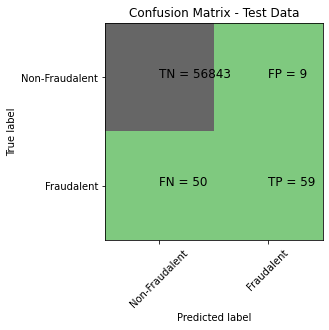

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.87      0.54      0.67       109

    accuracy                           1.00     56961
   macro avg       0.93      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987886448622741
Confusion Matrix


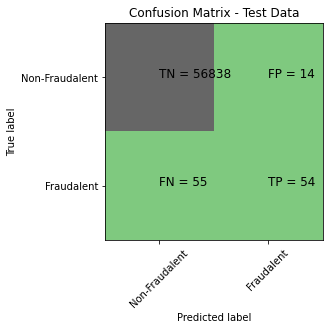

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.79      0.50      0.61       109

    accuracy                           1.00     56961
   macro avg       0.90      0.75      0.80     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.989311374713807
l2 threshold: 0.003005486434396053
ROC for the test dataset 98.9%


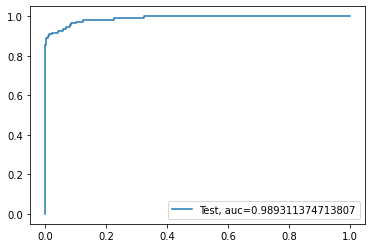

l1 roc_value: 0.9142366756884284
l1 threshold: 0.02598676277439102
ROC for the test dataset 91.4%


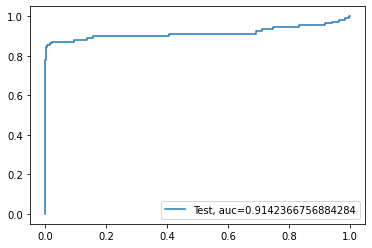

Time Taken by Model: --- 288.31327962875366 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992099857797441
Confusion Matrix


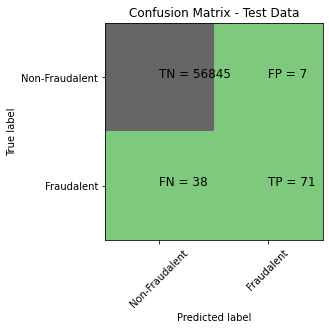

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.91      0.65      0.76       109

    accuracy                           1.00     56961
   macro avg       0.95      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8942923263816496
KNN threshold: 0.2
ROC for the test dataset 89.4%


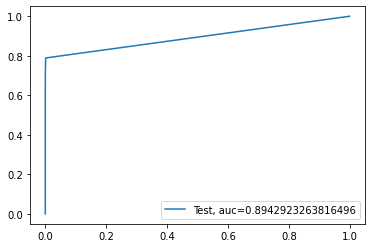

Time Taken by Model: --- 98.995441198349 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.999280209265989
Confusion Matrix


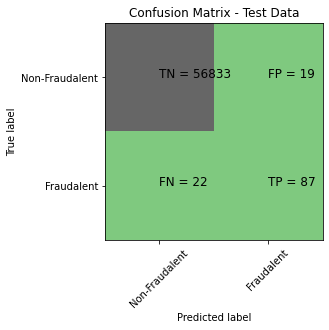

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.82      0.80      0.81       109

    accuracy                           1.00     56961
   macro avg       0.91      0.90      0.90     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8989154682655818
Tree threshold: 1.0
ROC for the test dataset 89.9%


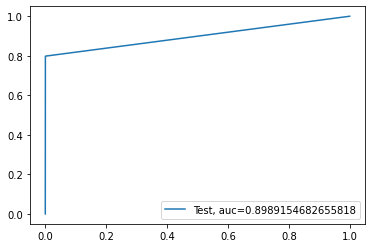

entropy score: 0.9990695388072541
Confusion Matrix


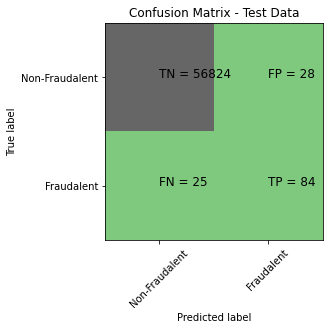

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.75      0.77      0.76       109

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8850748474874728
Tree threshold: 1.0
ROC for the test dataset 88.5%


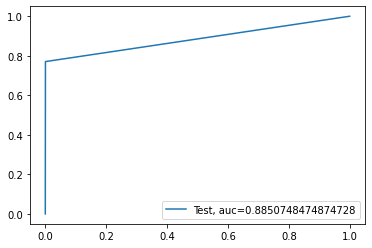

Time Taken by Model: --- 25.08384895324707 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995786590825302
Confusion Matrix


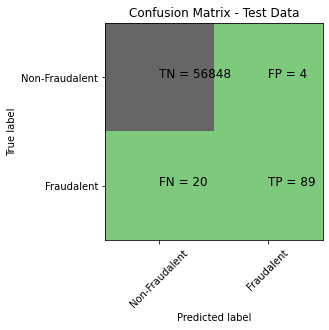

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.96      0.82      0.88       109

    accuracy                           1.00     56961
   macro avg       0.98      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9528171327838515
Random Forest threshold: 0.03
ROC for the test dataset 95.3%


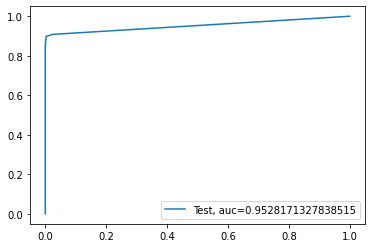

Time Taken by Model: --- 173.54381132125854 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


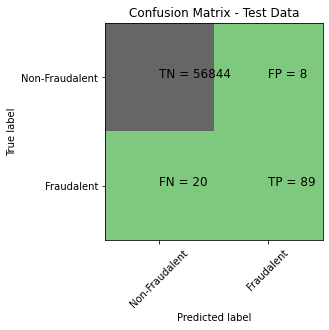

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.92      0.82      0.86       109

    accuracy                           1.00     56961
   macro avg       0.96      0.91      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9761482736117666
XGBoost threshold: 0.004546985495835543
ROC for the test dataset 97.6%


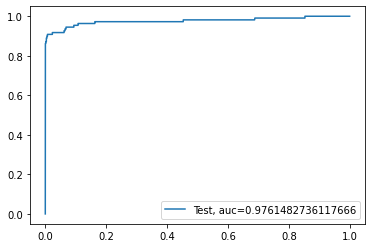

Time Taken by Model: --- 44.78682041168213 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9975070662383034
Confusion Matrix


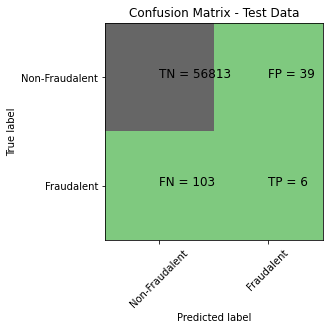

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.13      0.06      0.08       109

    accuracy                           1.00     56961
   macro avg       0.57      0.53      0.54     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.6552907049173874
SVM threshold: 0.0018573840117721704
ROC for the test dataset 65.5%


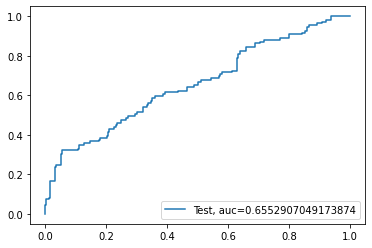

Time Taken by Model: --- 337.38131642341614 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987


**It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.981312**

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

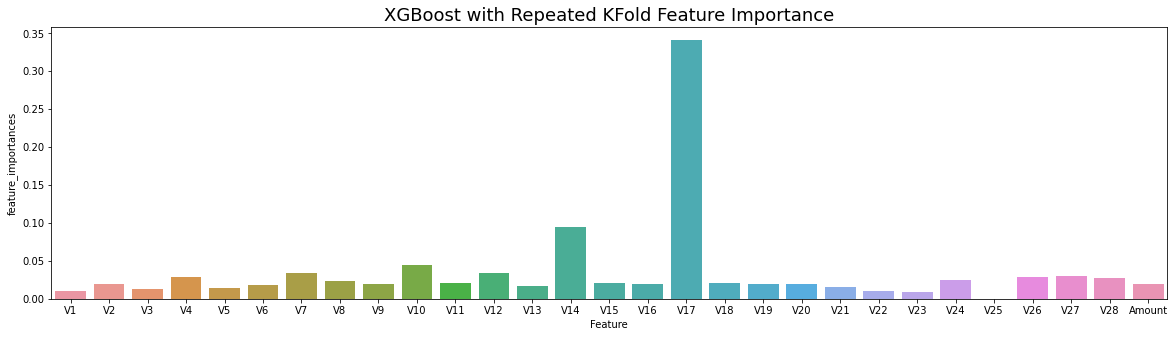

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

## Perform cross validation with StratifiedKFold

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827545209332399
Max auc_roc for l1: 0.9718588688608811
Parameters for l2 regularisations
[[ 0.00695726  0.06199257 -0.06687916  0.21838813  0.05416462 -0.03209572
  -0.02313035 -0.11479513 -0.06971402 -0.16352128  0.12792386 -0.19153363
  -0.03720016 -0.36053023  0.00377755 -0.0879309  -0.07292049 -0.00084981
   0.00396611 -0.02811191  0.0379528   0.02333927 -0.01149522 -0.00999206
  -0.00642083  0.00627413 -0.01012108 -0.00172082  0.0004016 ]]
[-7.41865662]
{1: array([[0.69891015, 0.70149274, 0.72141397, 0.84389704, 0.96686146,
        0.99058273, 0.99618417, 0.99483369, 0.99145186, 0.99151612,
        0.99151612, 0.99151612, 0.99151612, 0.99151612, 0.99151612,
        0.99151612, 0.99151612, 0.99151612, 0.99151612, 0.99151612],
       [0.60290675, 0.60404272, 0.62418521, 0.76516956, 0.9140552 ,
        0.95983011, 0.97488505, 0.98207144, 0.98537643, 0.98169434,
        0.98169434, 0.98169434, 0.98169434, 0.98169

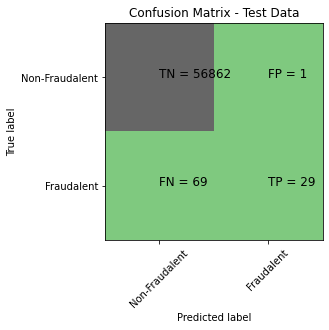

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9986481978897842
Confusion Matrix


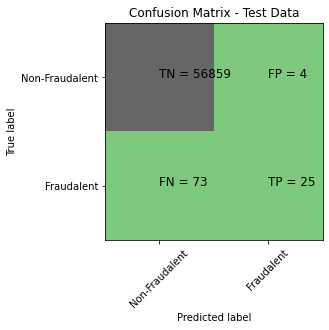

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.26      0.39        98

    accuracy                           1.00     56961
   macro avg       0.93      0.63      0.70     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833448600233932
l2 threshold: 0.0015694107904107846
ROC for the test dataset 98.3%


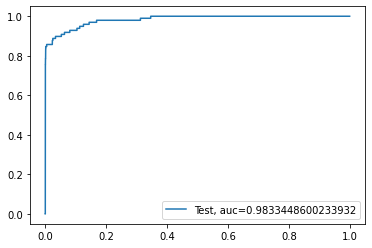

l1 roc_value: 0.9009118586850529
l1 threshold: 0.033186779619546906
ROC for the test dataset 90.1%


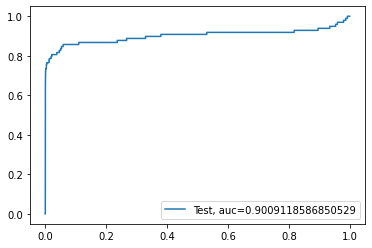

Time Taken by Model: --- 280.407918214798 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991222064219378
Confusion Matrix


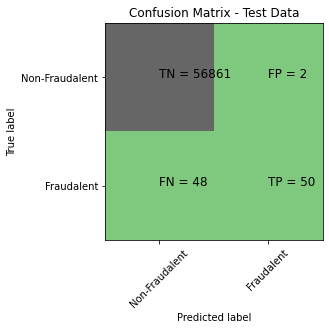

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


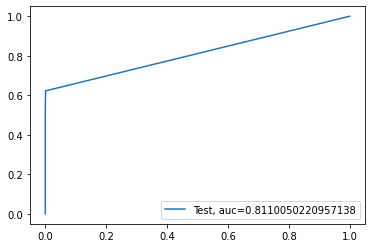

Time Taken by Model: --- 102.66916251182556 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


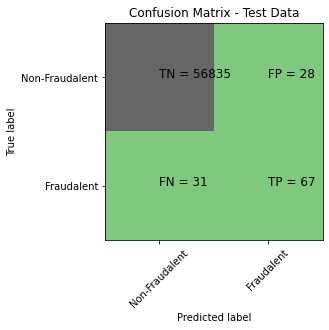

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


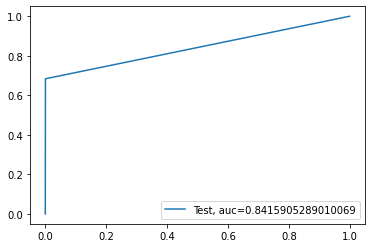

entropy score: 0.9990870946788153
Confusion Matrix


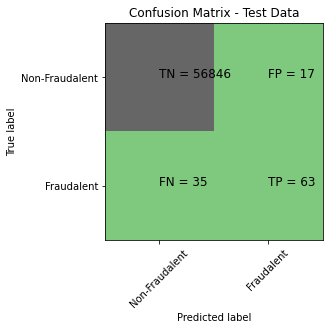

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


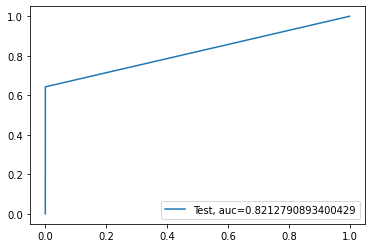

Time Taken by Model: --- 26.7802677154541 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


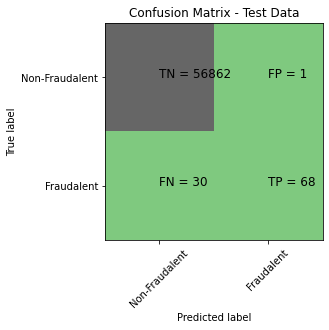

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


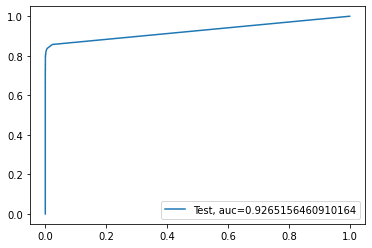

Time Taken by Model: --- 161.93157029151917 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


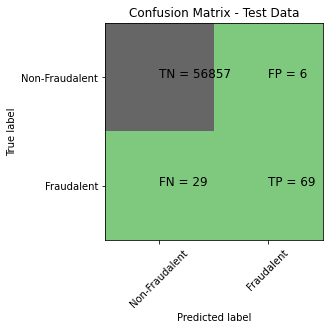

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9807945125538037
XGBoost threshold: 0.0014997341204434633
ROC for the test dataset 98.1%


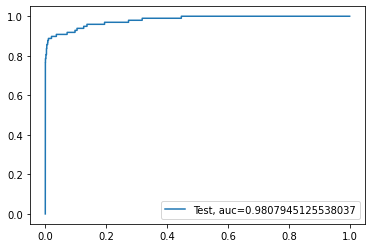

Time Taken by Model: --- 45.366286754608154 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


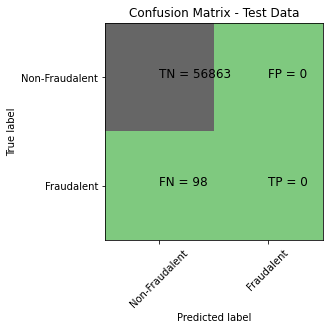

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40214557940370105
SVM threshold: 0.004318377229238607
ROC for the test dataset 40.2%


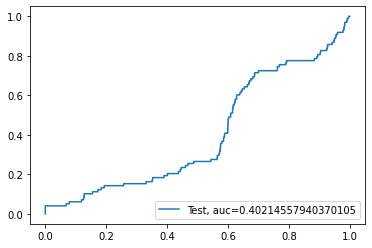

Time Taken by Model: --- 144.75394678115845 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9812819004700544
Parameters for l2 regularisations
[[ 0.00431091  0.0242149  -0.0906136   0.24487645  0.07830588 -0.03762044
  -0.02351513 -0.12406593 -0.08249687 -0.17100975  0.13244152 -0.20274254
  -0.03530277 -0.37987579 -0.00699957 -0.09918133 -0.08346561 -0.00331452
   0.00622033 -0.00946901  0.04423578  0.02888679 -0.02106435 -0.01214089
  -0.01680552  0.00562557 -0.00964428 -0.00465436  0.02807083]]
[-7.42222657]
{1: array([[0.98781915, 0.98781915, 0.98781915, 0.98781915, 0.98781915,
        0.9878292 , 0.98948446, 0.99110204, 0.99167975, 0.98893187,
        0.98893187, 0.98893187, 0.98893187, 0.98893187, 0.98893187,
        0.98893187, 0.98893187, 0.98893187, 0.98893187, 0.98893187],
       [0.94846831, 0.94846831, 0.94846831, 0.94846831, 0.94846225,
        0.9484774 , 0.95437656, 0.95854523, 0.95623284, 0.94723635,
        0.93718368, 0.93718368, 0.93718368, 0.93718368, 0.93718368,
        0.93718368, 0.93718368, 0.93718368, 0.93718368, 0.93718368],
   

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
searchCV_l2.coef_

array([[ 0.00431091,  0.0242149 , -0.0906136 ,  0.24487645,  0.07830588,
        -0.03762044, -0.02351513, -0.12406593, -0.08249687, -0.17100975,
         0.13244152, -0.20274254, -0.03530277, -0.37987579, -0.00699957,
        -0.09918133, -0.08346561, -0.00331452,  0.00622033, -0.00946901,
         0.04423578,  0.02888679, -0.02106435, -0.01214089, -0.01680552,
         0.00562557, -0.00964428, -0.00465436,  0.02807083]])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

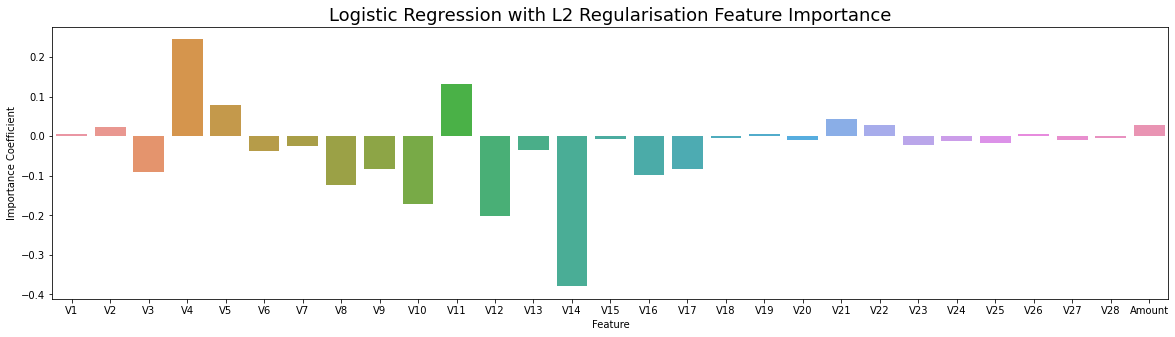

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

### As the models Oversampling data, take significantly longer time to run.

We will try with undersampling methods

In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9811732883738612
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.04218743  0.04085411 -0.12270653  0.41201418  0.05701589 -0.06788473
  -0.04232975 -0.14824148 -0.09862623 -0.20351924  0.12306509 -0.28092992
  -0.0612485  -0.36750519 -0.03718231 -0.08543898 -0.0604529   0.04987629
  -0.0325884  -0.04590611  0.0762412   0.03964916 -0.07877201 -0.01684657
   0.00295621 -0.02446646  0.03117463  0.0098678   0.0882269 ]]
[-2.761744]
{1: array([[0.96570513, 0.96570513, 0.96570513, 0.96570513, 0.96602564,
        0.9650641 , 0.97019231, 0.97371795, 0.97724359, 0.98044872,
        0.98621795, 0.98621795, 0.98621795, 0.98621795, 0.98621795,
        0.98621795, 0.98621795, 0.98621795, 0.98621795, 0.98621795],
       [0.98375569, 0.98375569, 0.98375569, 0.98375569, 0.98408057,
        0.98732943, 0.98830409, 0.98927875, 0.98635478, 0.98473034,
        0.98310591, 0.98310591, 0.98310591, 0.98310591, 0.98310591,


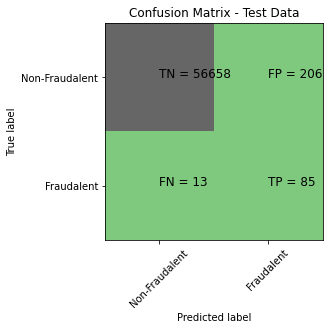

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.87      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.93      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9982795547909132
Confusion Matrix


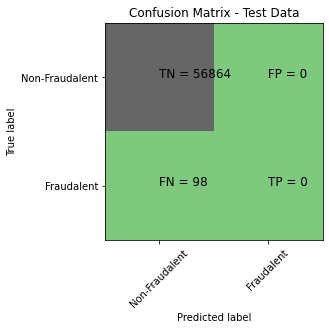

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9856156974607513
l2 threshold: 0.20420220494299893
ROC for the test dataset 98.6%


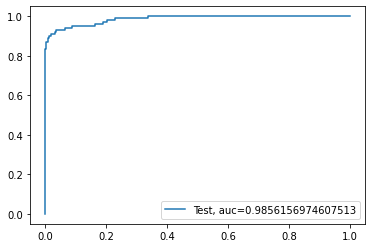

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


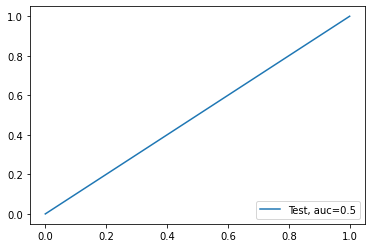

Time Taken by Model: --- 1.917285442352295 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9878339945928865
Confusion Matrix


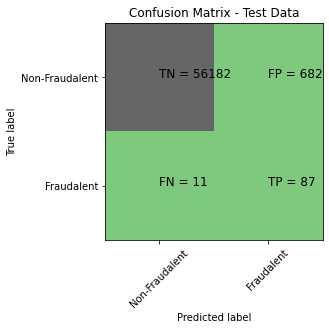

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.89      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

KNN roc_value: 0.9670655297853525
KNN threshold: 0.6
ROC for the test dataset 96.7%


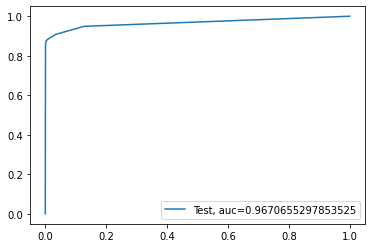

Time Taken by Model: --- 9.968684911727905 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9375197500087777
Confusion Matrix


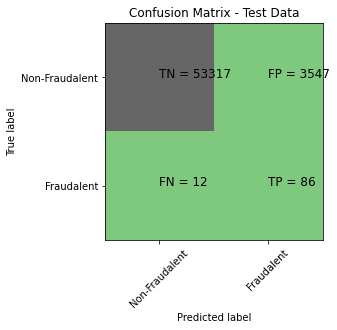

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.88      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.91      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.9075870605698667
Tree threshold: 1.0
ROC for the test dataset 90.8%


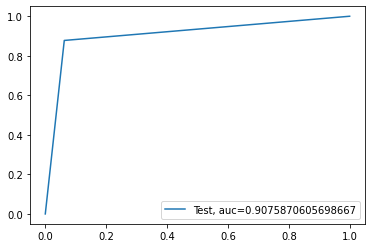

entropy score: 0.9318317474807767
Confusion Matrix


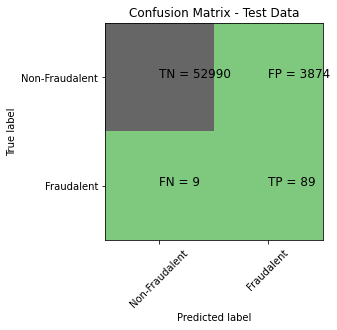

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962

entropy tree_roc_value: 0.9200179016457456
Tree threshold: 1.0
ROC for the test dataset 92.0%


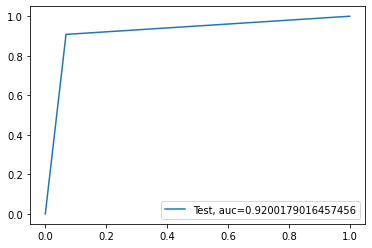

Time Taken by Model: --- 0.7448601722717285 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9917313296583687
Confusion Matrix


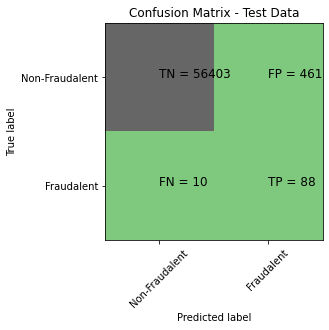

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.90      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9818796979258784
Random Forest threshold: 0.45
ROC for the test dataset 98.2%


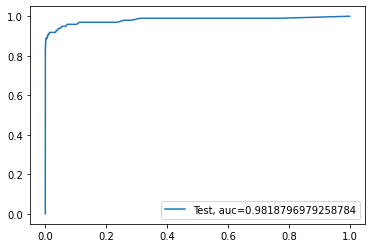

Time Taken by Model: --- 2.3373830318450928 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9859379937502194
Confusion Matrix


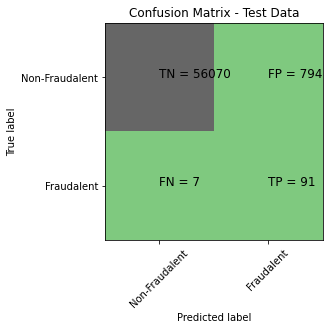

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.93      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.59     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9816254213418626
XGBoost threshold: 0.4978269934654236
ROC for the test dataset 98.2%


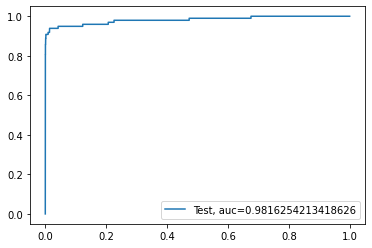

Time Taken by Model: --- 1.0840442180633545 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9283733014992451
Confusion Matrix


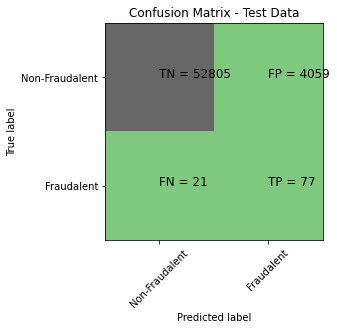

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.79      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.86      0.50     56962
weighted avg       1.00      0.93      0.96     56962

SVM roc_value: 0.8905485555223778
SVM threshold: 0.21155817851037423
ROC for the test dataset 89.1%


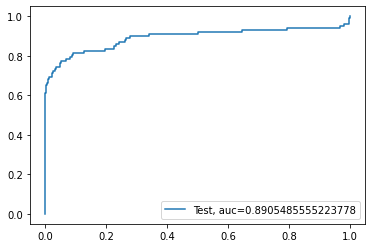

Time Taken by Model: --- 1.487201452255249 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987




**It seems Undersampling has impoved the XGBoost Results**


## Model building with balancing Classes

Perform class balancing with :

*    Random Oversampling
*    SMOTE
*    ADASYN










## Oversampling with RandomOverSampler and StratifiedKFold Cross Validation



We will use Random Oversampling method to handle the class imbalance

1.    First we will display class distibution with and without the Random Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.


Once we have train and test dataset we will feed the data to below models:

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest
7.    XGBoost
8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.
9.    Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique



In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9856587543002897
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.36798354  0.38563529  0.29501653  0.82139545  0.31723161 -0.48639409
  -0.36271529 -0.32395346 -0.23882216 -0.65958381  0.26035032 -0.81236206
  -0.32167807 -0.90742805  0.05582339 -0.51821128 -0.2744932  -0.12136074
   0.11138859 -0.71921024  0.04743204  0.50497026  0.11084666 -0.43148427
   0.23601312 -0.06309031 -0.37089271  0.18747769  0.00550725]]
[-4.58138041]
{1: array([[0.62816254, 0.75671699, 0.91100625, 0.96284699, 0.97951261,
        0.98354204, 0.98455123, 0.98510599, 0.98537299, 0.98545261,
        0.98545261, 0.98545261, 0.98545261, 0.98545261, 0.98545261,
        0.98545261, 0.98545261, 0.98545261, 0.98545261, 0.98545261],
       [0.63368465, 0.75754622, 0.90946824, 0.9617949 , 0.97881332,
        0.98324615, 0.98432016, 0.98477672, 0.98505781, 0.9851626 ,
        0.9851626 , 0.9851626 , 0.9851626 , 0.9851626 , 0.9851626 

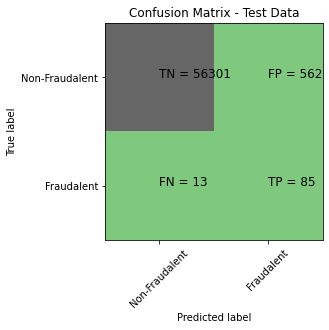

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


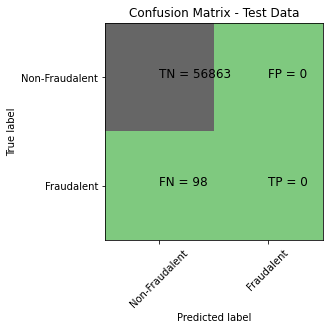

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9802705177176652
l2 threshold: 0.26691219315885034
ROC for the test dataset 98.0%


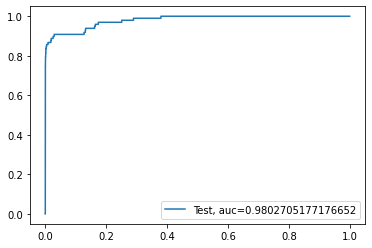

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


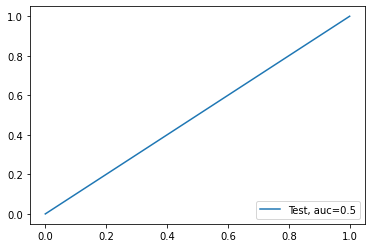

Time Taken by Model: --- 345.10018277168274 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9987184213760292
Confusion Matrix


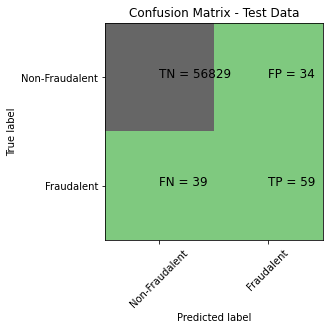

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.60      0.62        98

    accuracy                           1.00     56961
   macro avg       0.82      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8109839366870678
KNN threshold: 0.2
ROC for the test dataset 81.1%


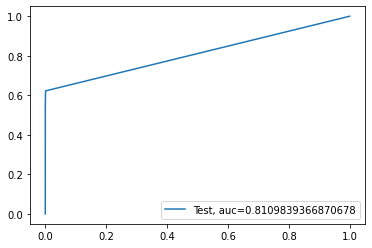

Time Taken by Model: --- 105.77573204040527 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989290918347641
Confusion Matrix


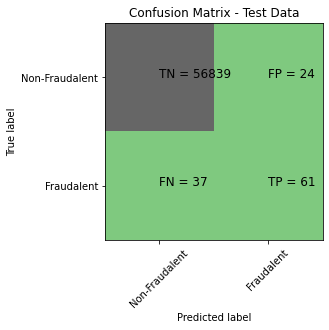

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.72      0.62      0.67        98

    accuracy                           1.00     56961
   macro avg       0.86      0.81      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8110134562591722
Tree threshold: 1.0
ROC for the test dataset 81.1%


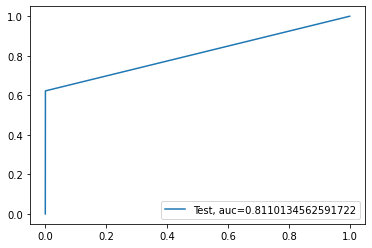

entropy score: 0.9989817594494479
Confusion Matrix


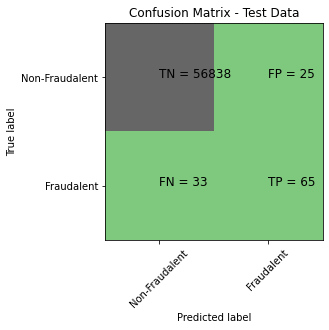

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.72      0.66      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8314128264604472
Tree threshold: 1.0
ROC for the test dataset 83.1%


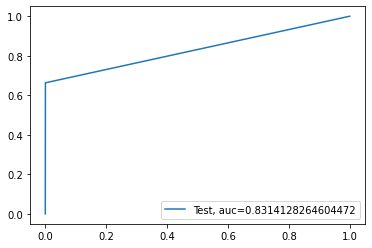

Time Taken by Model: --- 19.594422101974487 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


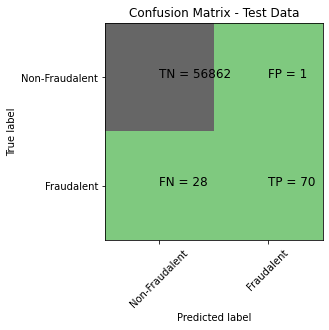

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9520513321133106
Random Forest threshold: 0.01
ROC for the test dataset 95.2%


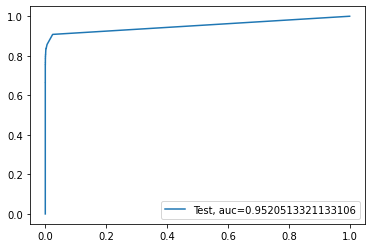

Time Taken by Model: --- 132.19486165046692 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9965766050455575
Confusion Matrix


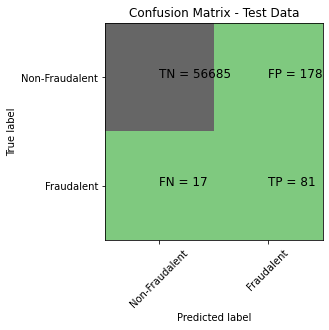

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.83      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.91      0.73     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9810984116137353
XGBoost threshold: 0.17996612191200256
ROC for the test dataset 98.1%


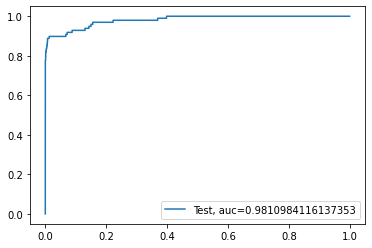

Time Taken by Model: --- 58.667059659957886 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987


### Results for Random Oversampling:

**Random Oversampling seems to have +ve change in prediction for XGBoost** Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique


### Similarly explore other algorithms on balanced dataset by building models like:

-    KNN
-    SVM
-    Decision Tree
-    Random Forest
-    XGBoost




## Oversampling with SMOTE Oversamplng

We will use SMOTE Oversampling method to handle the class imbalance

1.    First we will display class distibution with and without the SMOTE Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest

7.    XGBoost

8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9.    Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique



## Print the class distribution after applying SMOTE

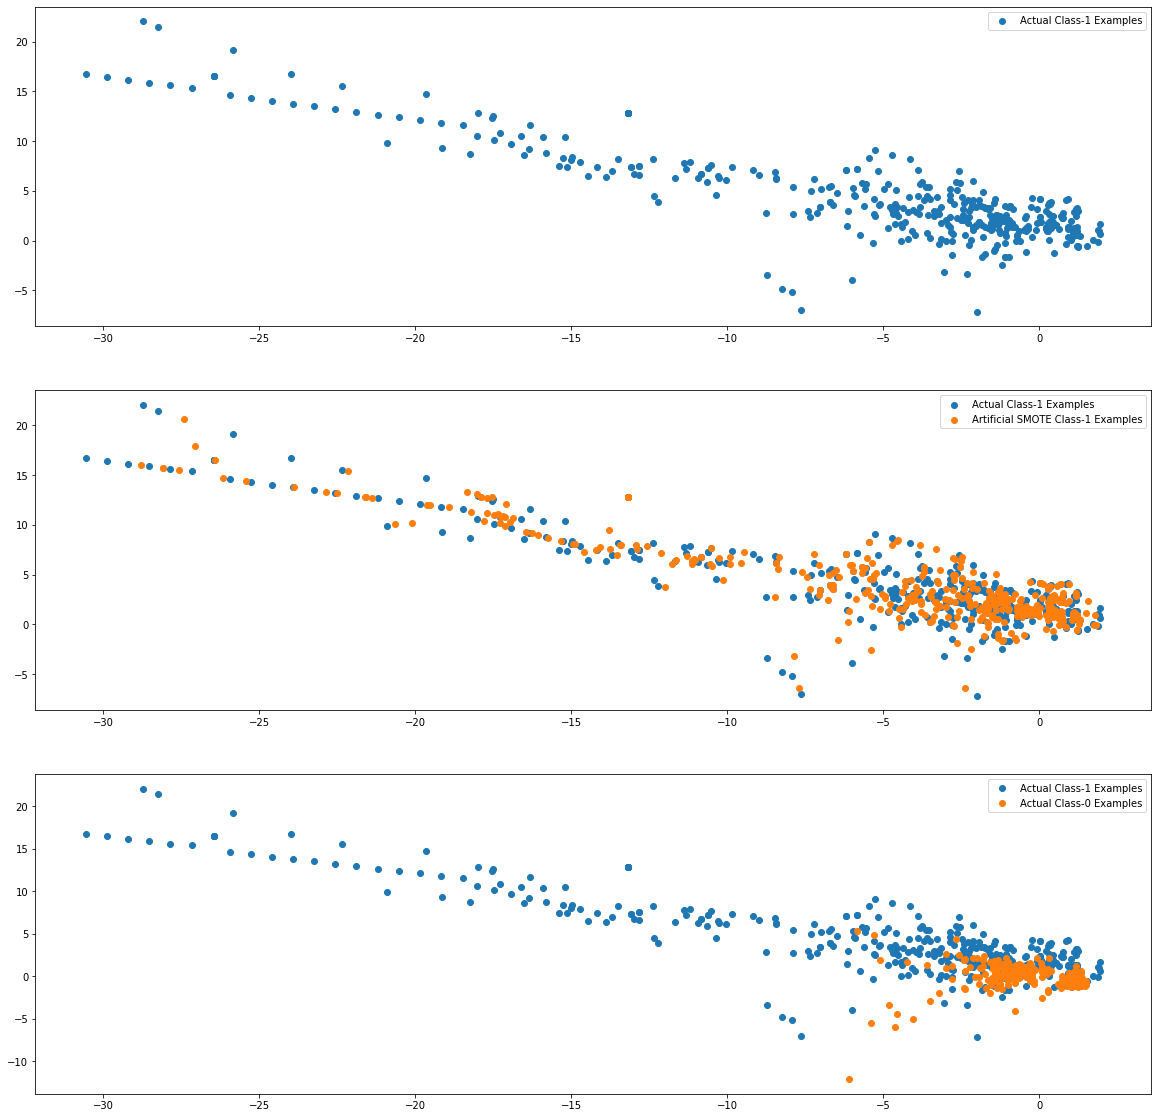

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9929642553198536
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.80683124  0.67056778  0.63168648  0.9652245   0.59351617 -0.71417374
  -0.73577274 -0.47693996 -0.4805836  -1.05506568  0.6660712  -1.23563547
  -0.25285895 -1.48996041  0.10329736 -0.73884823 -0.8831271  -0.490252
   0.23017604 -1.12726855  0.00664756  0.58896851  0.39053753 -0.80774995
   0.49480111  0.09736275 -0.34690013  0.78289697  0.00893127]]
[-5.10193202]
{1: array([[0.64836479, 0.78425958, 0.92254271, 0.97072402, 0.9864497 ,
        0.98986219, 0.99072266, 0.99156707, 0.99186804, 0.9919546 ,
        0.9919706 , 0.9919706 , 0.9919706 , 0.9919706 , 0.9919706 ,
        0.9919706 , 0.9919706 , 0.9919706 , 0.9919706 , 0.9919706 ],
       [0.64535121, 0.78373587, 0.92493545, 0.97315934, 0.98817747,
        0.99119638, 0.99191794, 0.99270389, 0.99303582, 0.99312163,
        0.99313409, 0.99313409, 0.99313409, 0.99313409, 0.99313409,


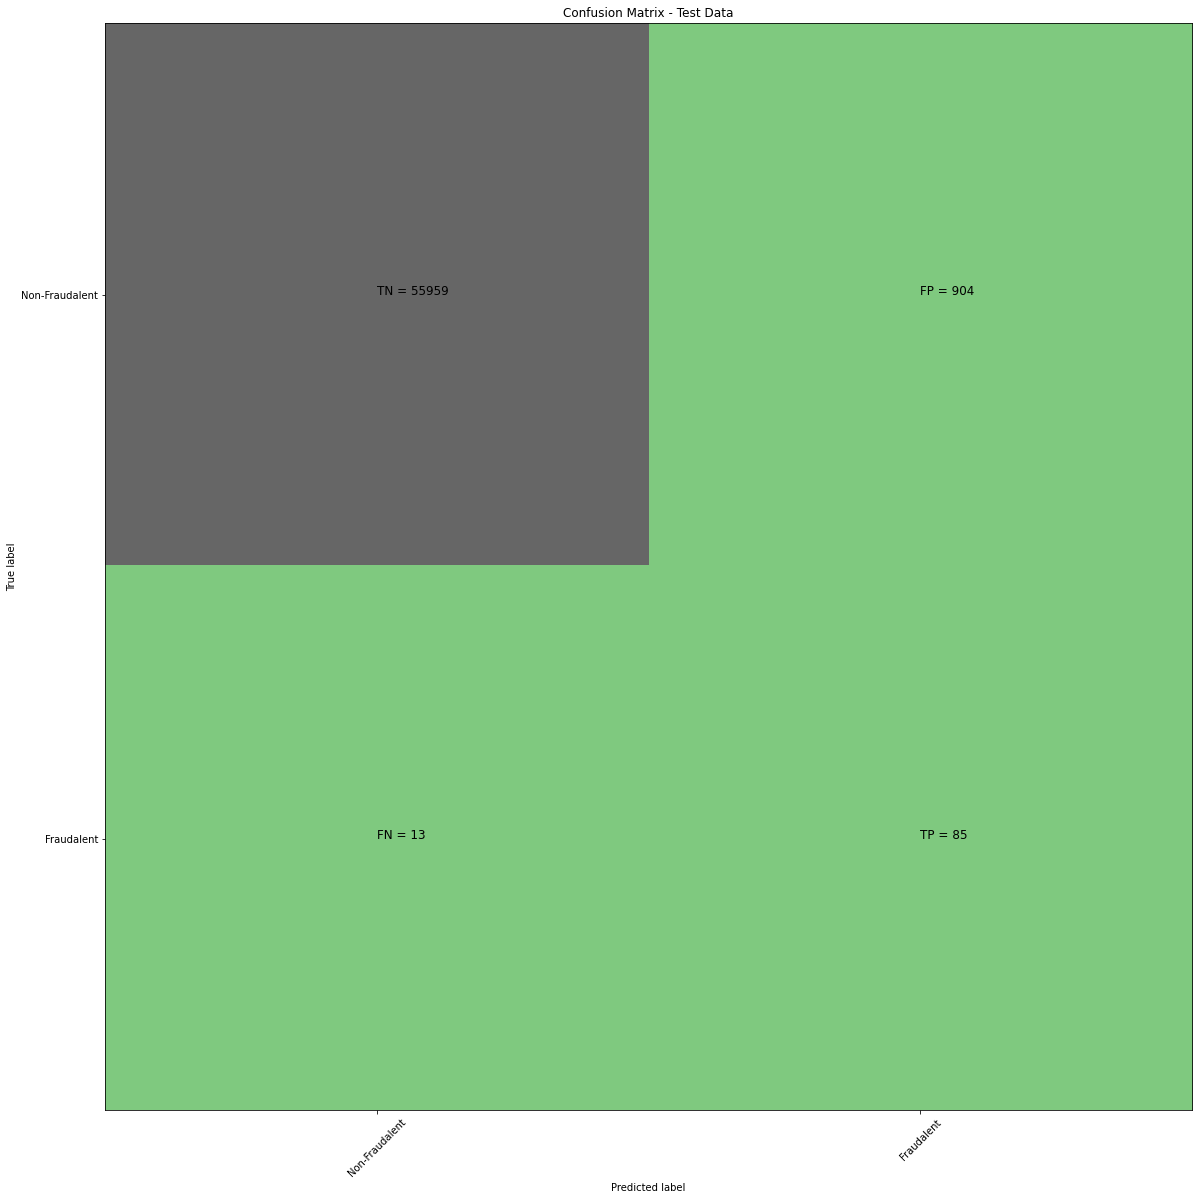

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


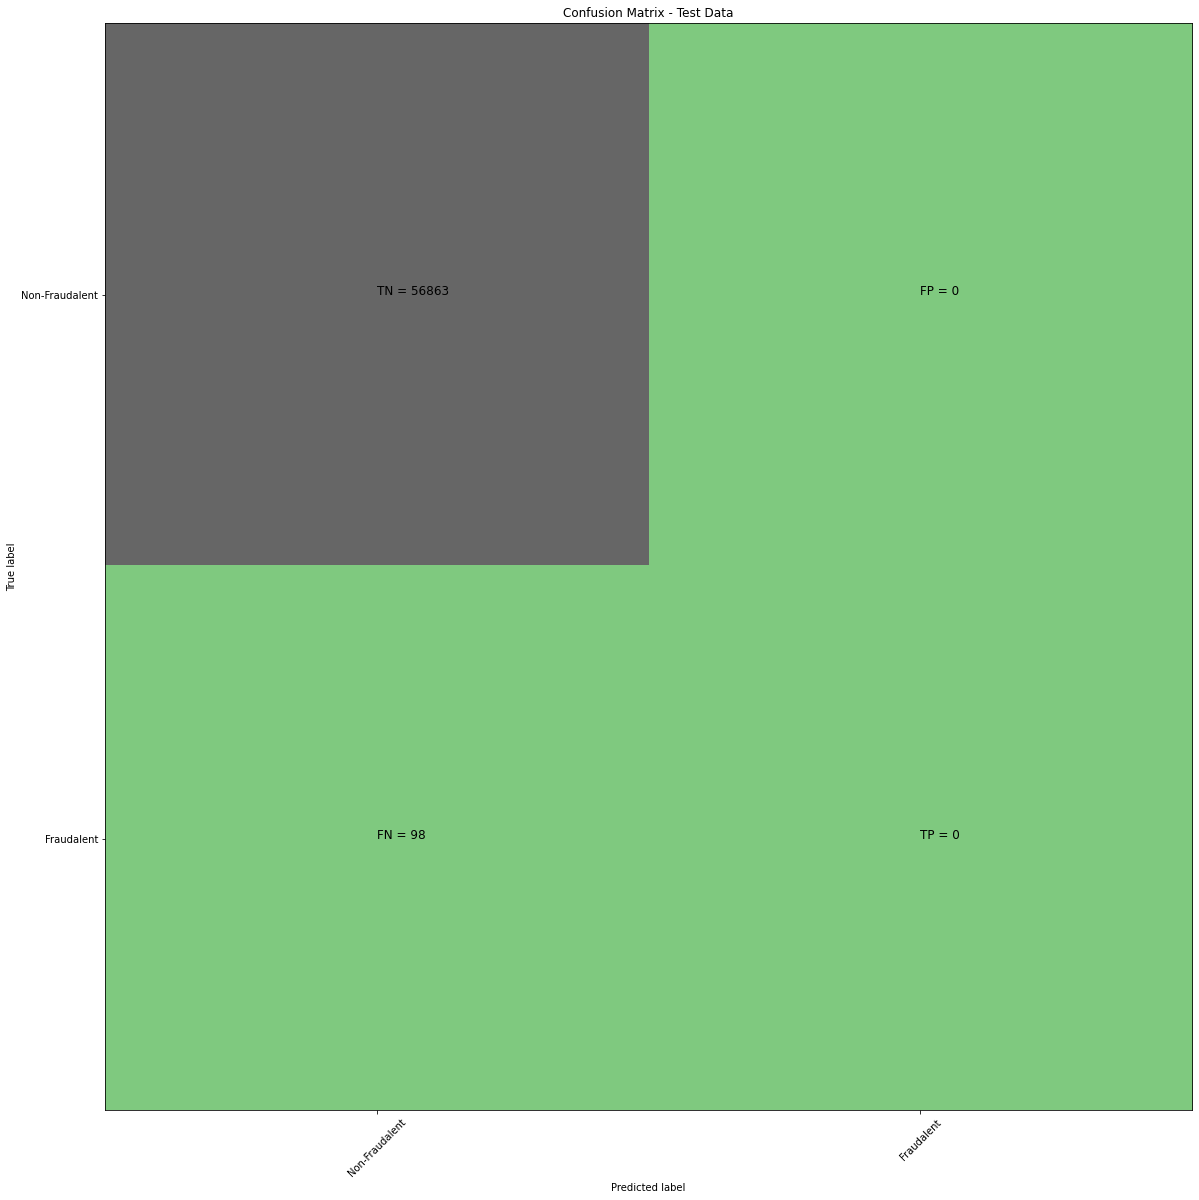

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9755969144599964
l2 threshold: 0.3813670382502313
ROC for the test dataset 97.6%


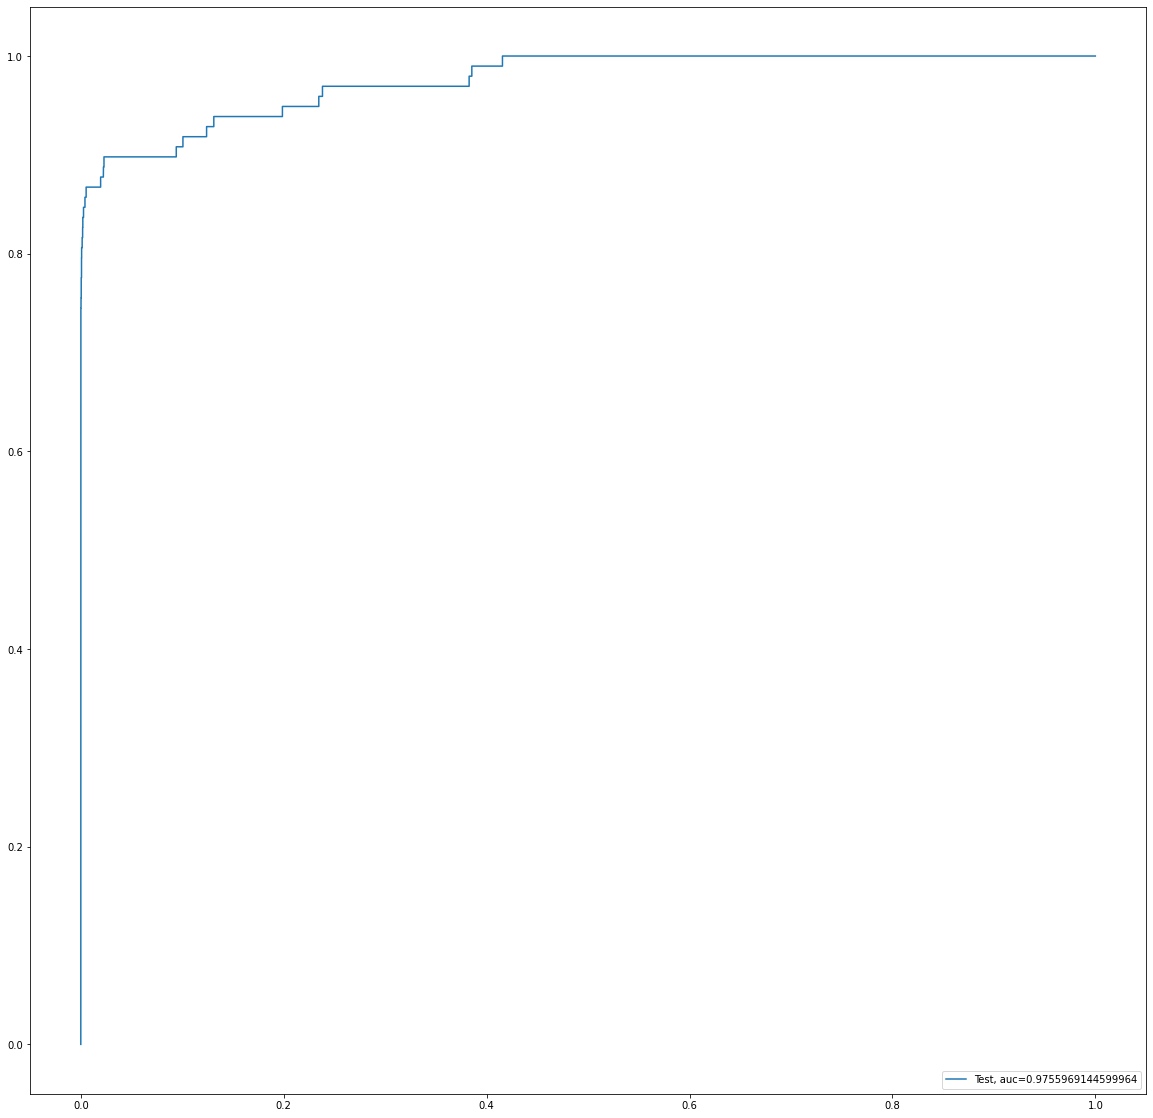

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


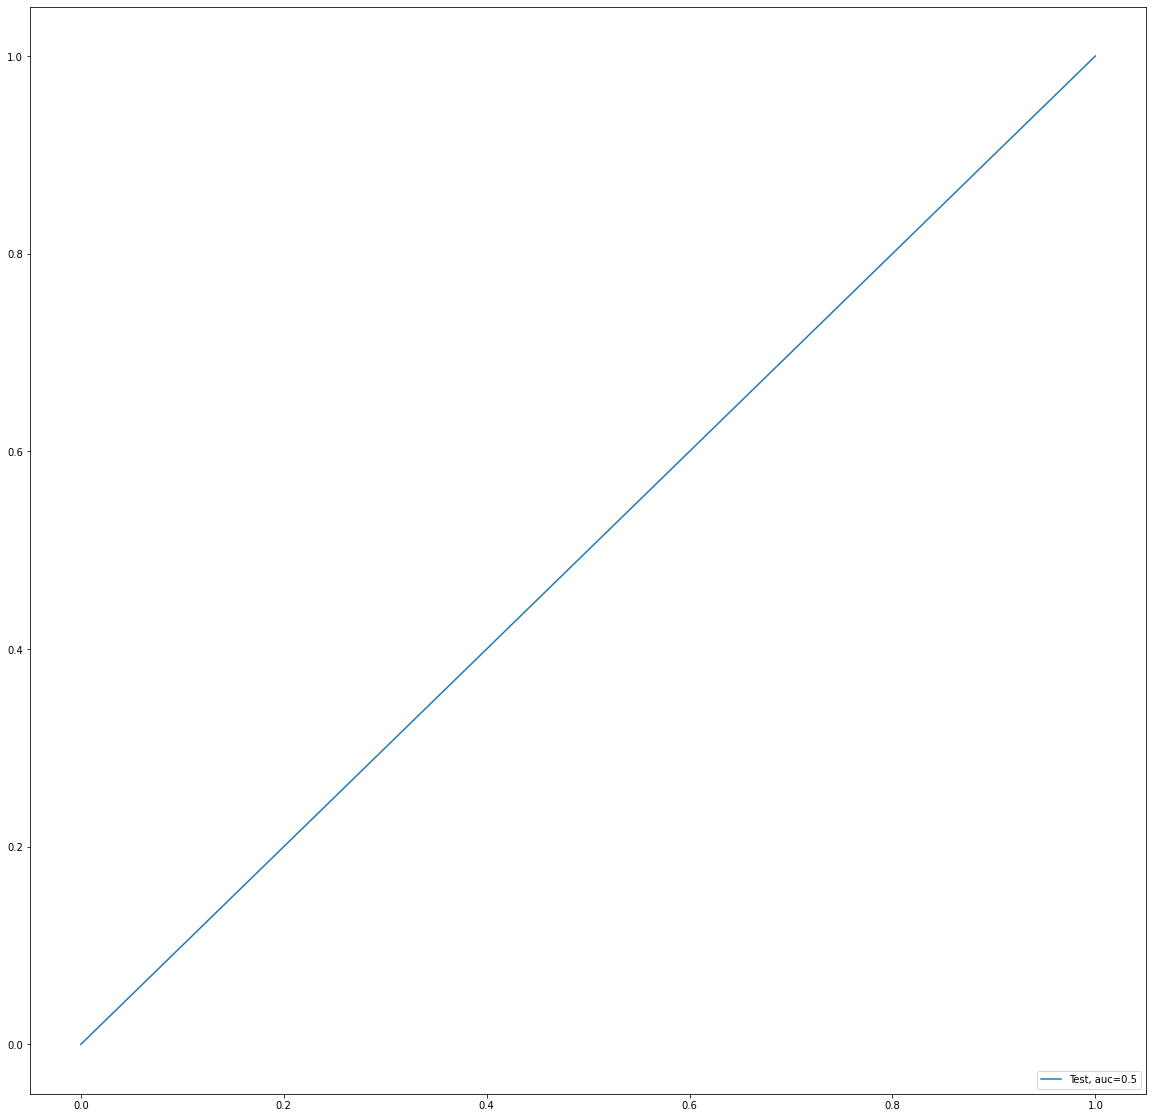

Time Taken by Model: --- 491.3763463497162 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9962079317427713
Confusion Matrix


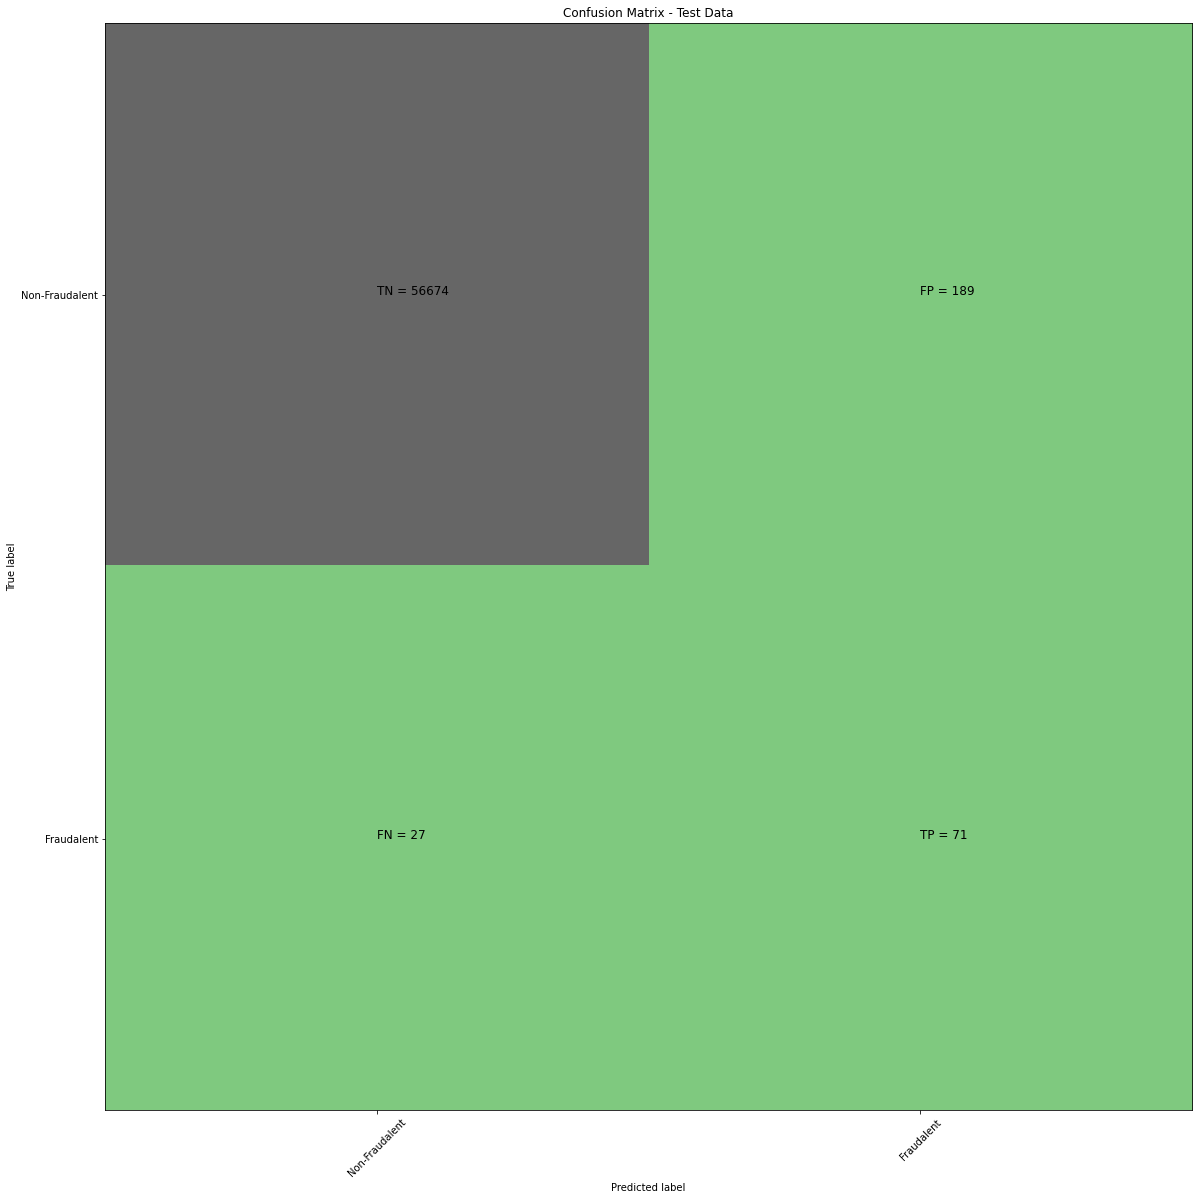

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


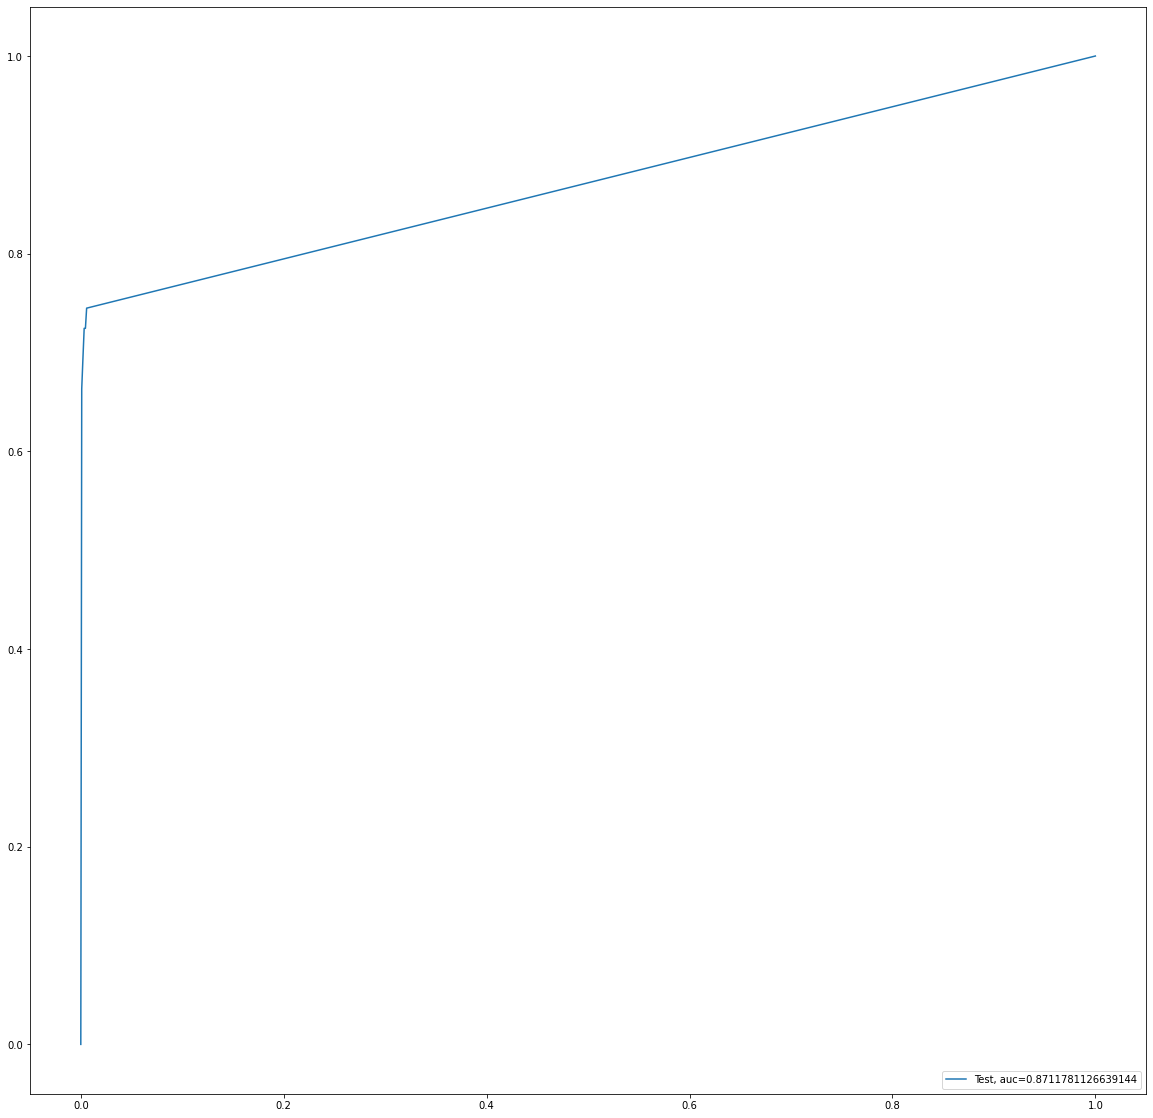

Time Taken by Model: --- 135.8304407596588 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980512982567019
Confusion Matrix


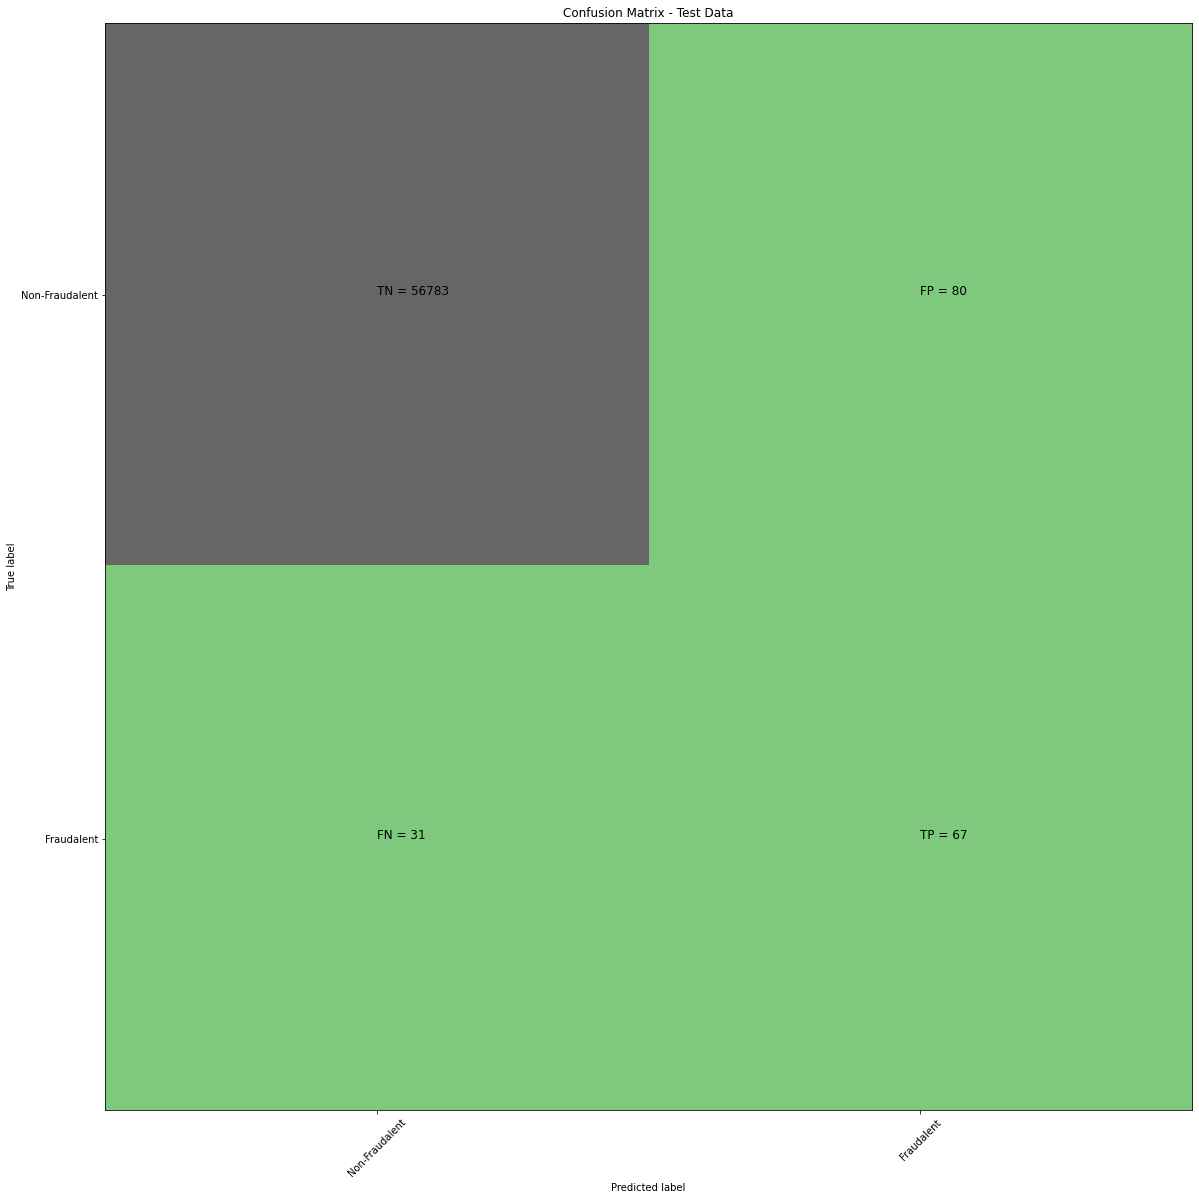

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.68      0.55        98

    accuracy                           1.00     56961
   macro avg       0.73      0.84      0.77     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8411332895713902
Tree threshold: 1.0
ROC for the test dataset 84.1%


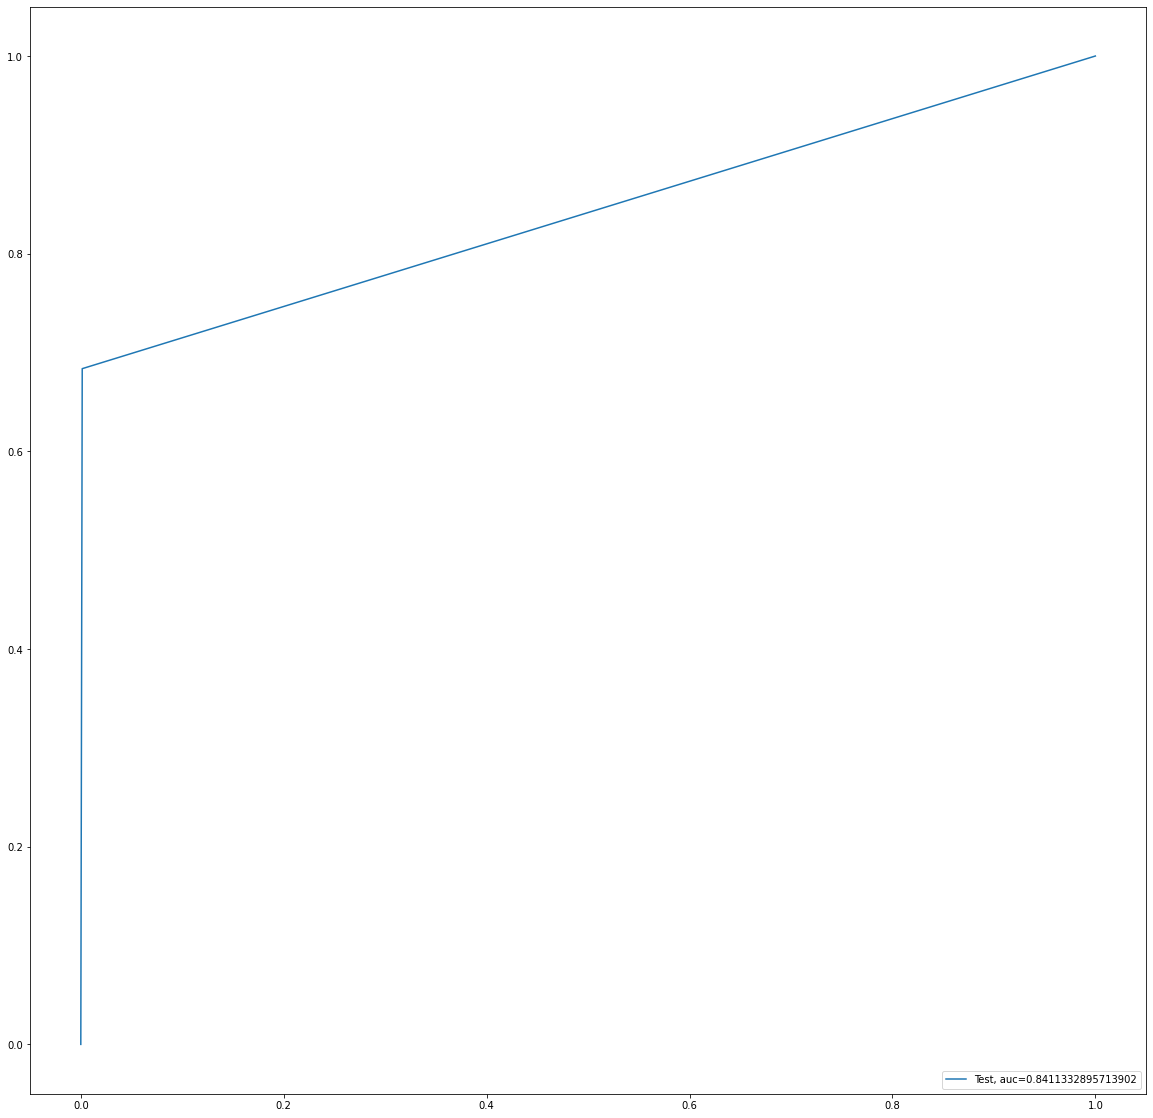

entropy score: 0.9983146363301206
Confusion Matrix


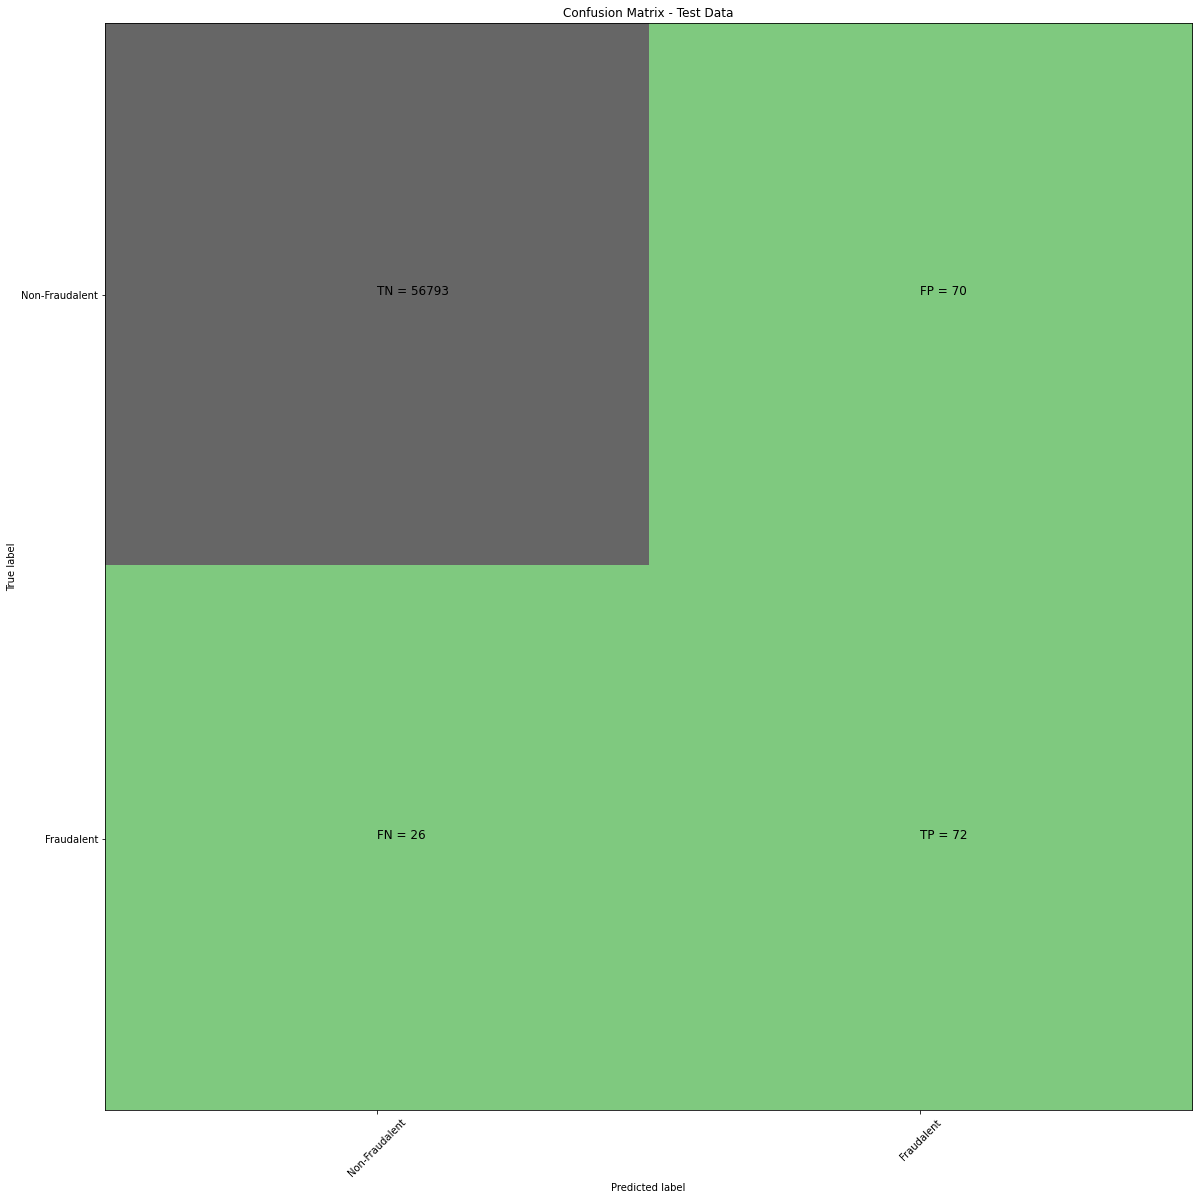

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.51      0.73      0.60        98

    accuracy                           1.00     56961
   macro avg       0.75      0.87      0.80     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8667314242933337
Tree threshold: 1.0
ROC for the test dataset 86.7%


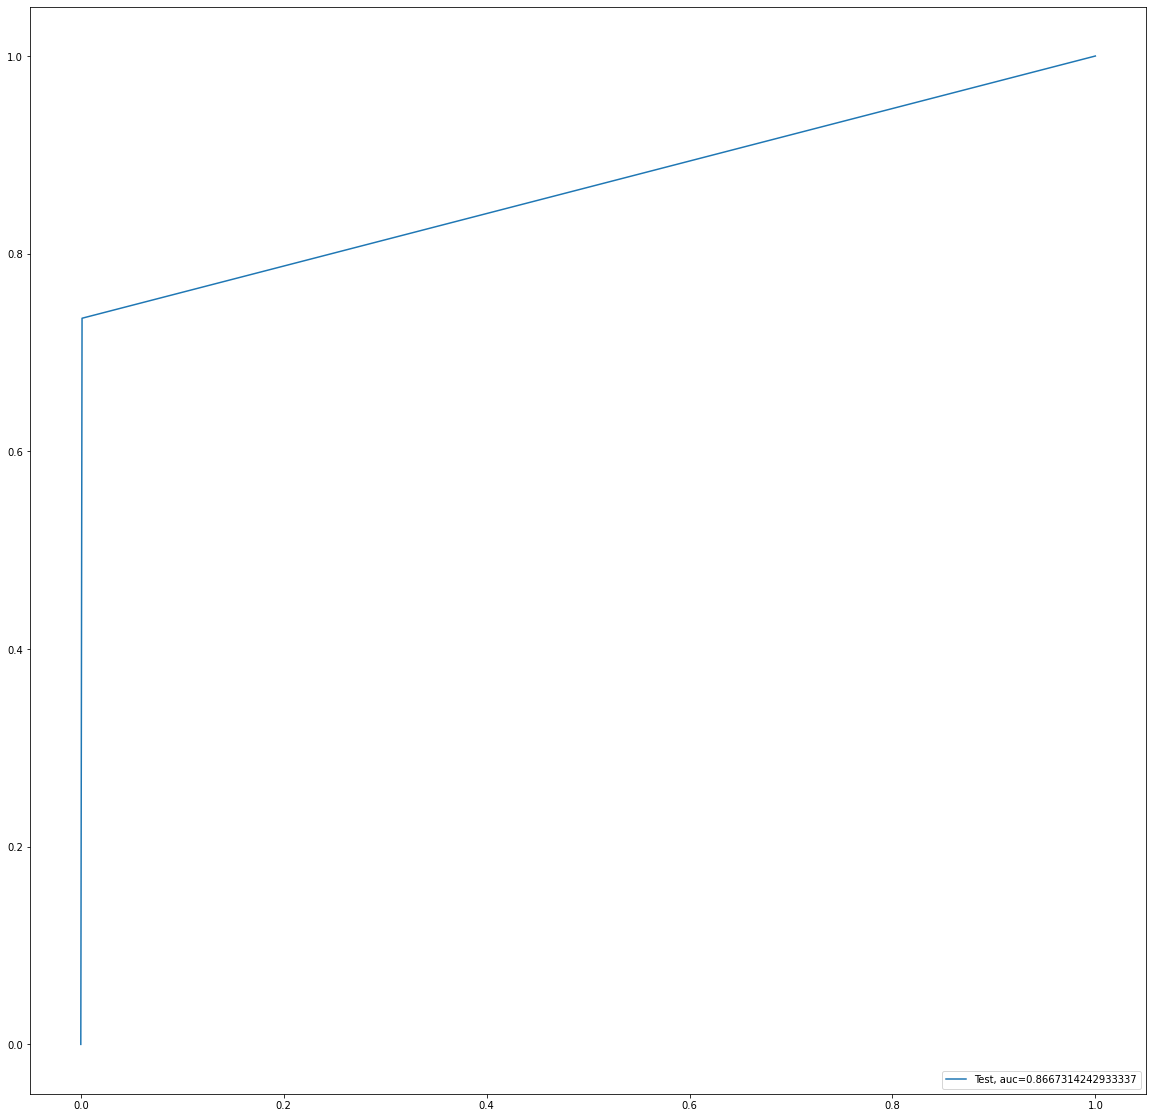

Time Taken by Model: --- 61.05509567260742 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


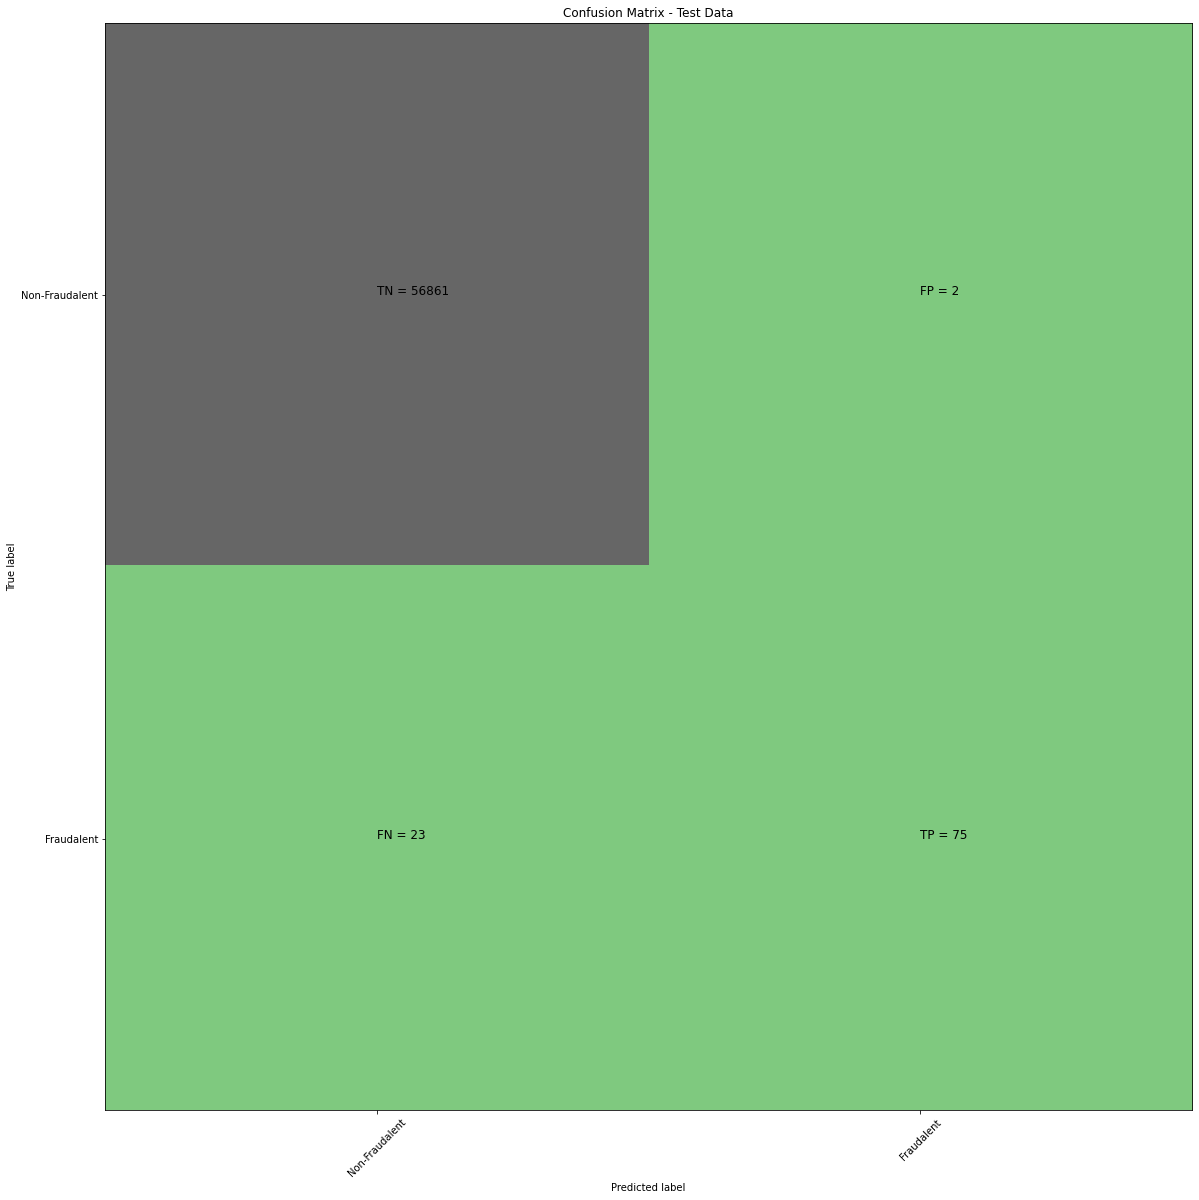

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9474941023663391
Random Forest threshold: 0.03
ROC for the test dataset 94.7%


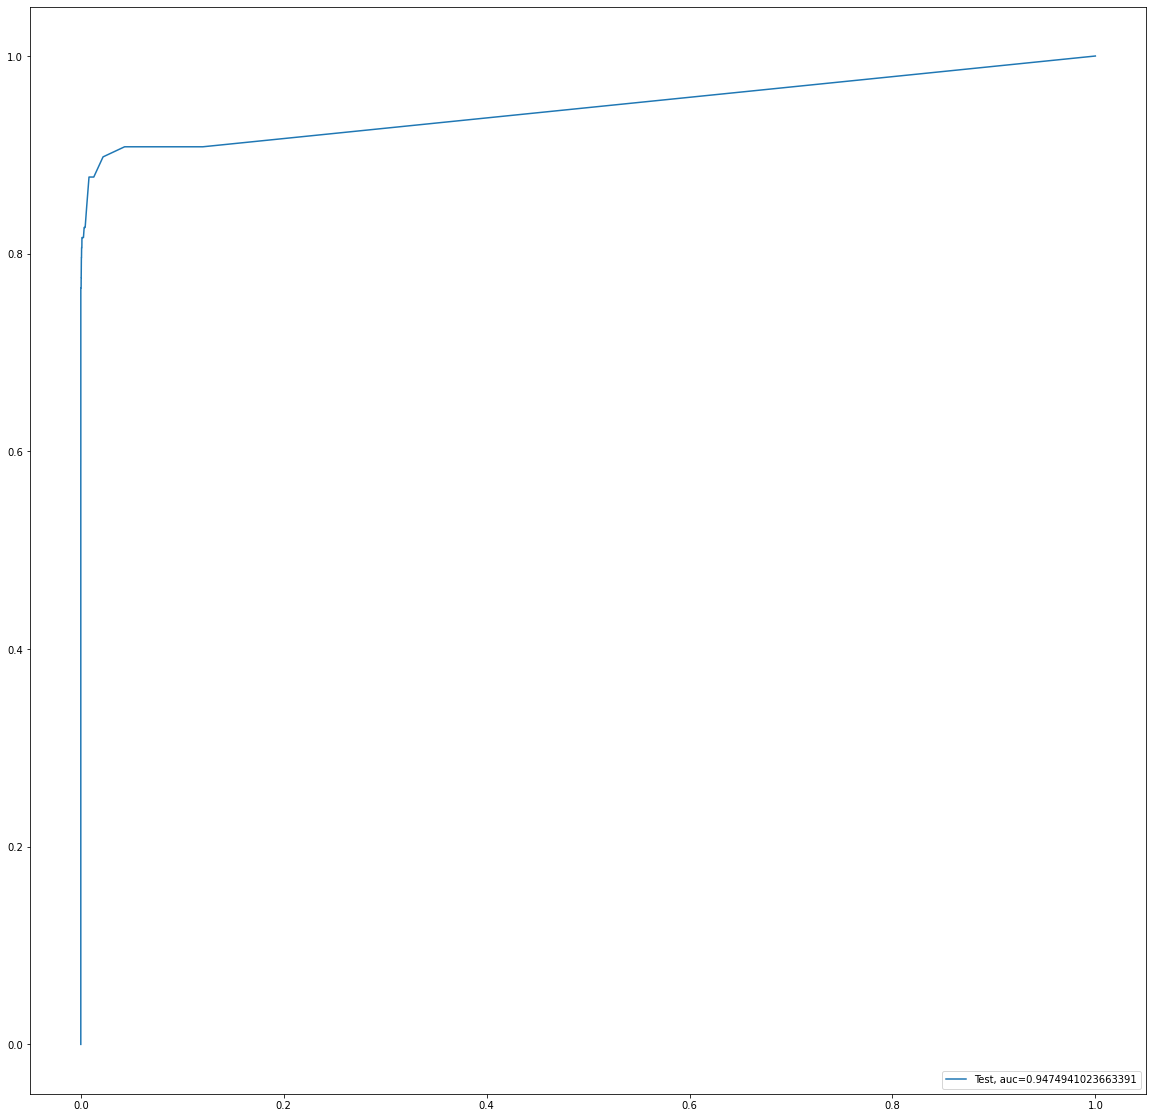

Time Taken by Model: --- 291.2620141506195 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.993802777338881
Confusion Matrix


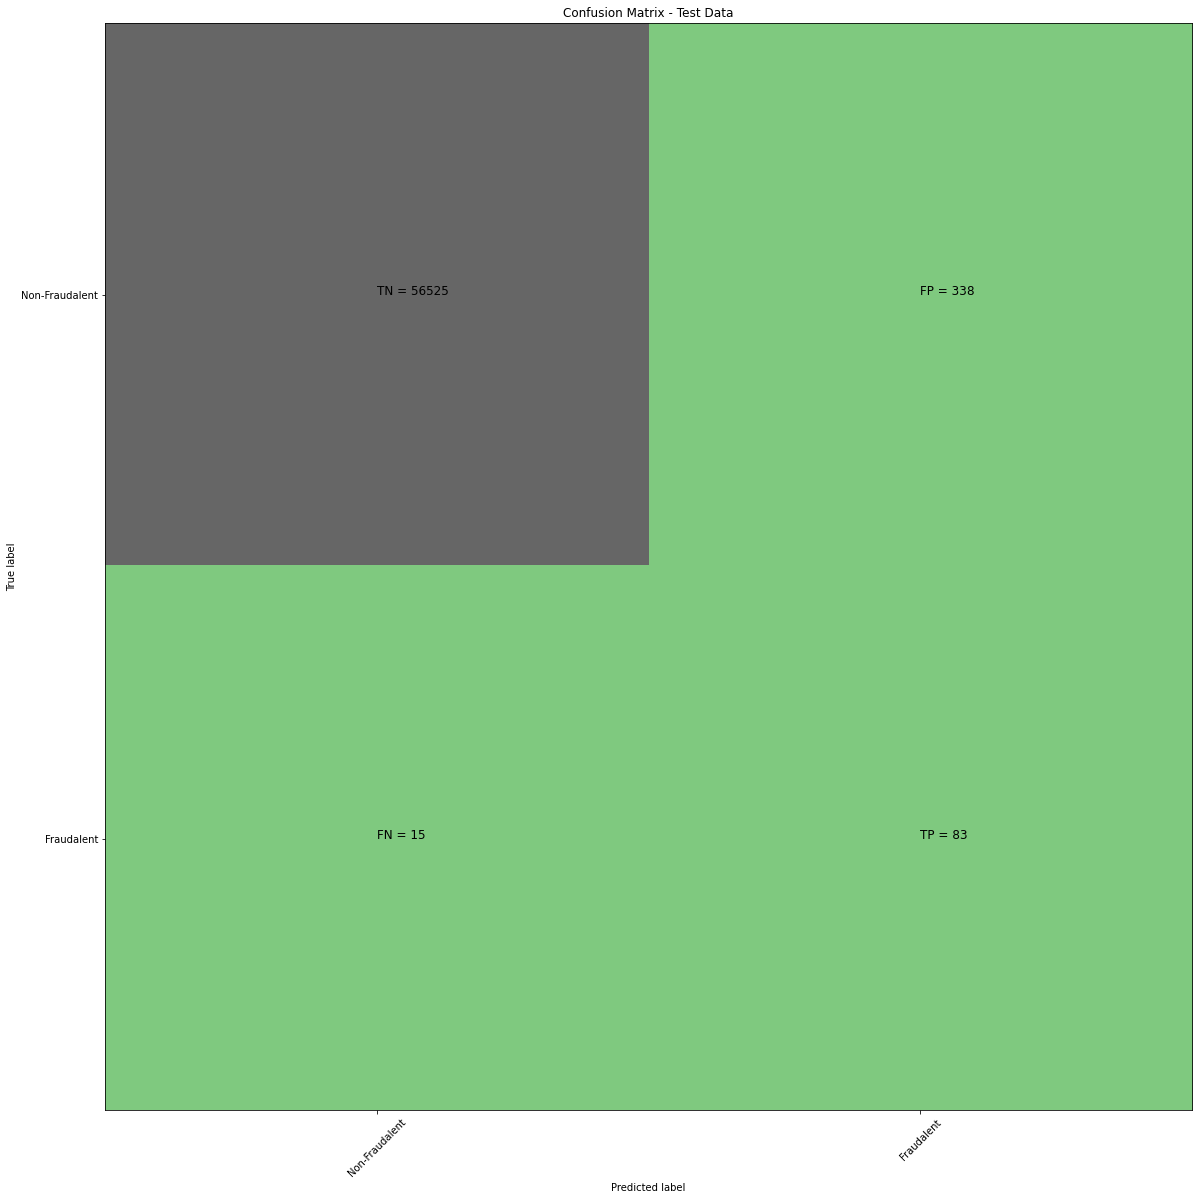

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.85      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.92      0.66     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9838894916424619
XGBoost threshold: 0.2753083109855652
ROC for the test dataset 98.4%


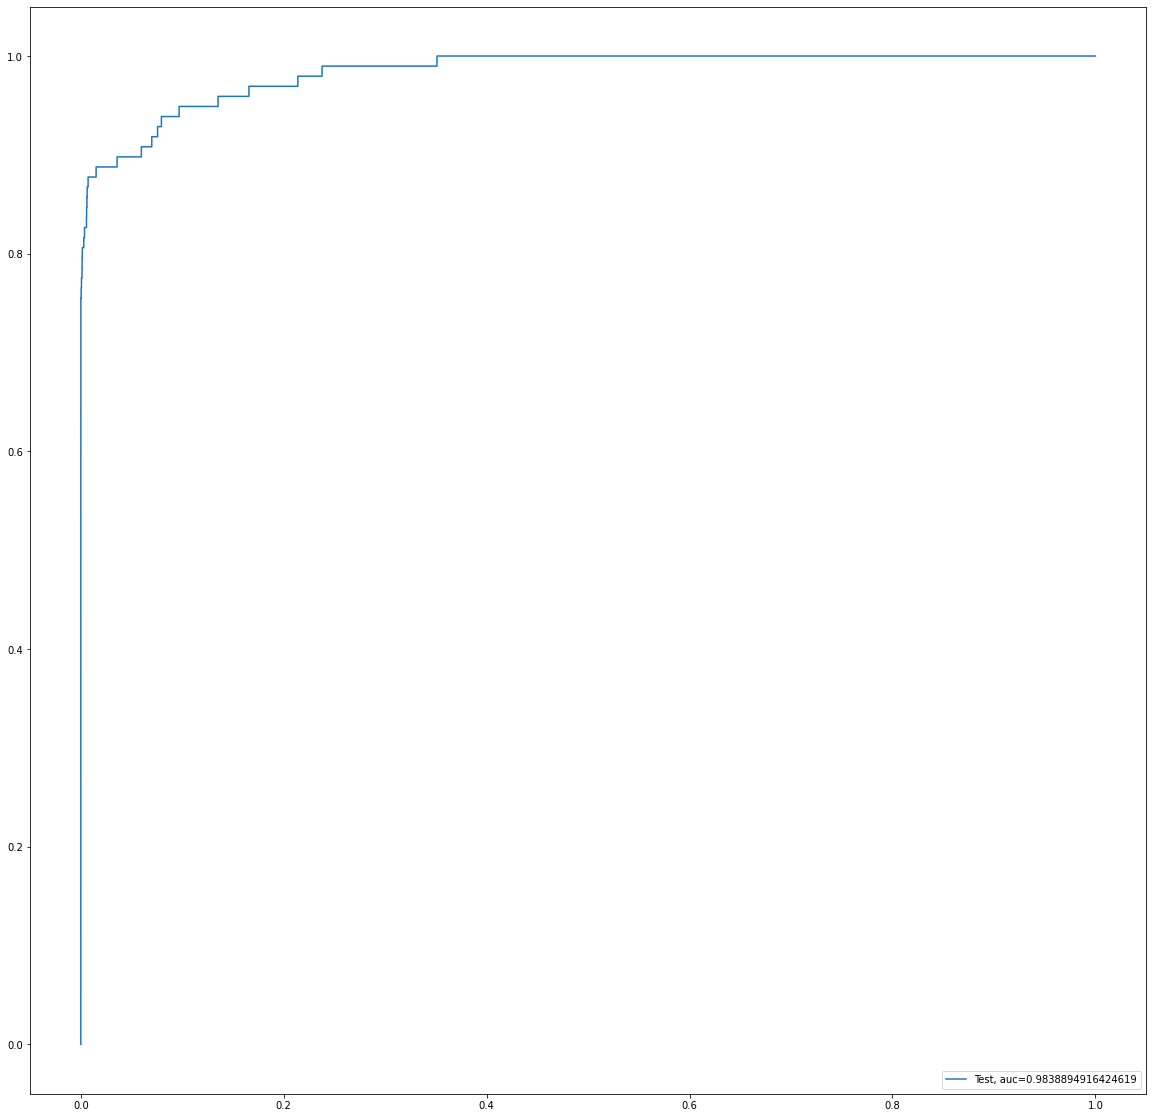

Time Taken by Model: --- 98.33268404006958 seconds ---
--------------------------------------------------------------------------------


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
plt.rcParams['figure.figsize'] = [10, 5]
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
plt.rcParams['figure.figsize'] = [10, 5]
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
plt.rcParams['figure.figsize'] = [10, 5]
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
plt.rcParams['figure.figsize'] = [10, 5]
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987


## Results for SMOTE Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

## Oversampling with ADASYN Oversampling




**We will use ADASYN Oversampling method to handle the class imbalance**

1.    First we will display class distibution with and without the ADASYN Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

**Once we have train and test dataset we will feed the data to below models:**

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest

7.    XGBoost

8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9.    Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique



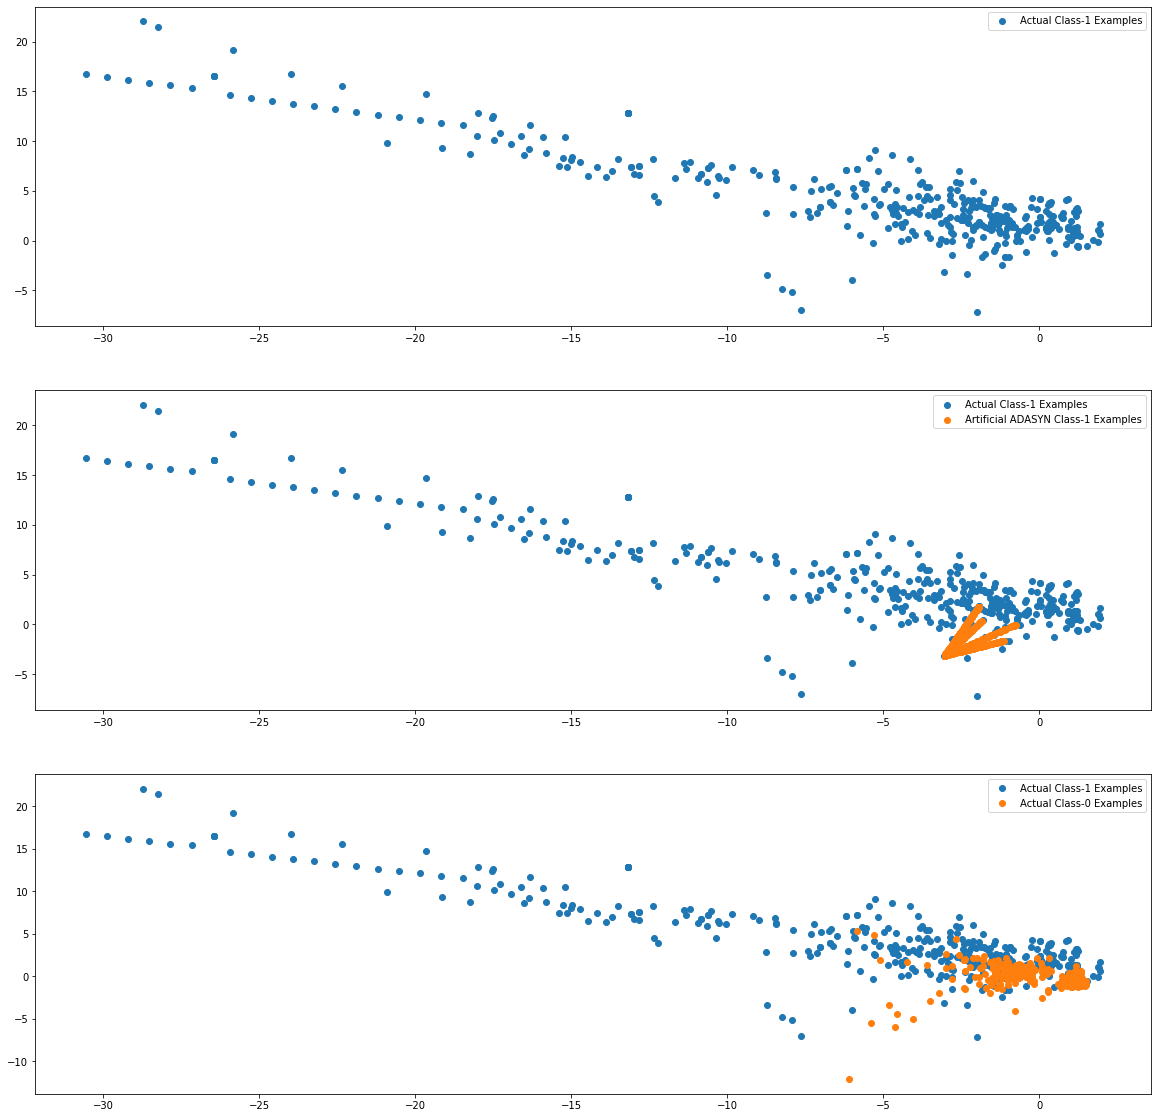

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

#### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9812735714737691
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 1.04690618  1.05821649  0.81838913  0.96075151  0.91509642 -0.91501299
  -1.01617243 -0.54734595 -0.41935688 -1.05238835  0.85111609 -1.46286057
  -0.18525557 -1.98518272  0.12928481 -0.96337925 -1.23565355 -0.61739913
   0.37326921 -1.47726389 -0.19273394  0.76946921  0.67404688 -0.9883478
   0.75980715  0.22704799  0.02620993  1.35711091  0.01312941]]
[-4.70501421]
{1: array([[0.62574532, 0.64411708, 0.71954794, 0.86374349, 0.95561018,
        0.97262511, 0.97684668, 0.97989627, 0.98107572, 0.98145789,
        0.98151424, 0.98151424, 0.98151424, 0.98151424, 0.98151424,
        0.98151424, 0.98151424, 0.98151424, 0.98151424, 0.98151424],
       [0.62660697, 0.6450749 , 0.72034531, 0.86366095, 0.95481762,
        0.97167303, 0.97592514, 0.9790298 , 0.98025284, 0.98062003,
        0.98068911, 0.98068911, 0.98068911, 0.98068911, 0.98068911,

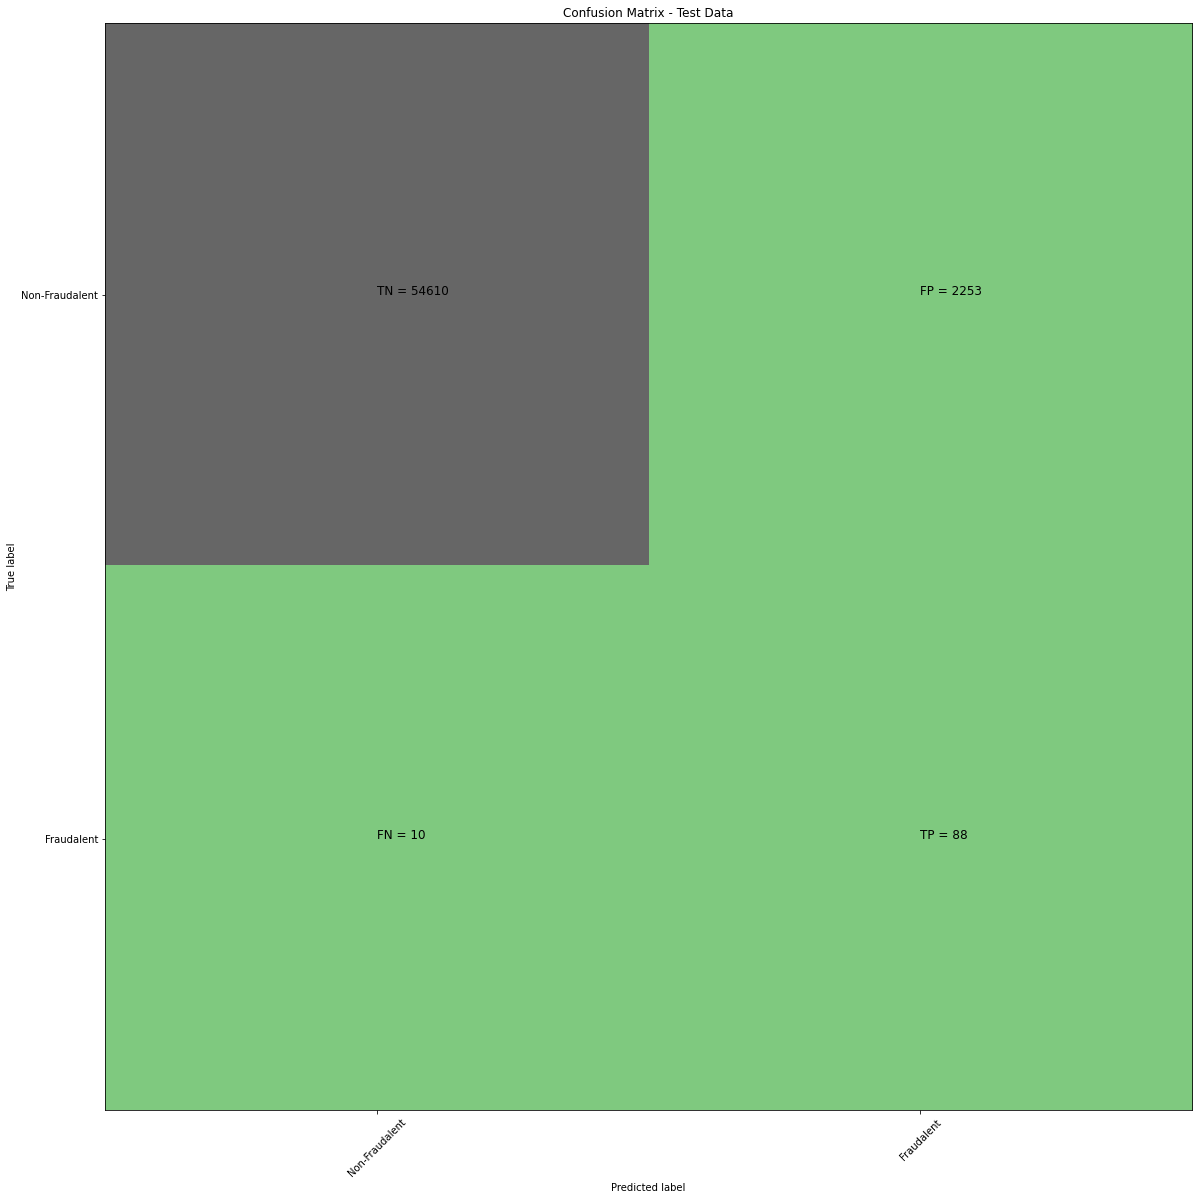

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


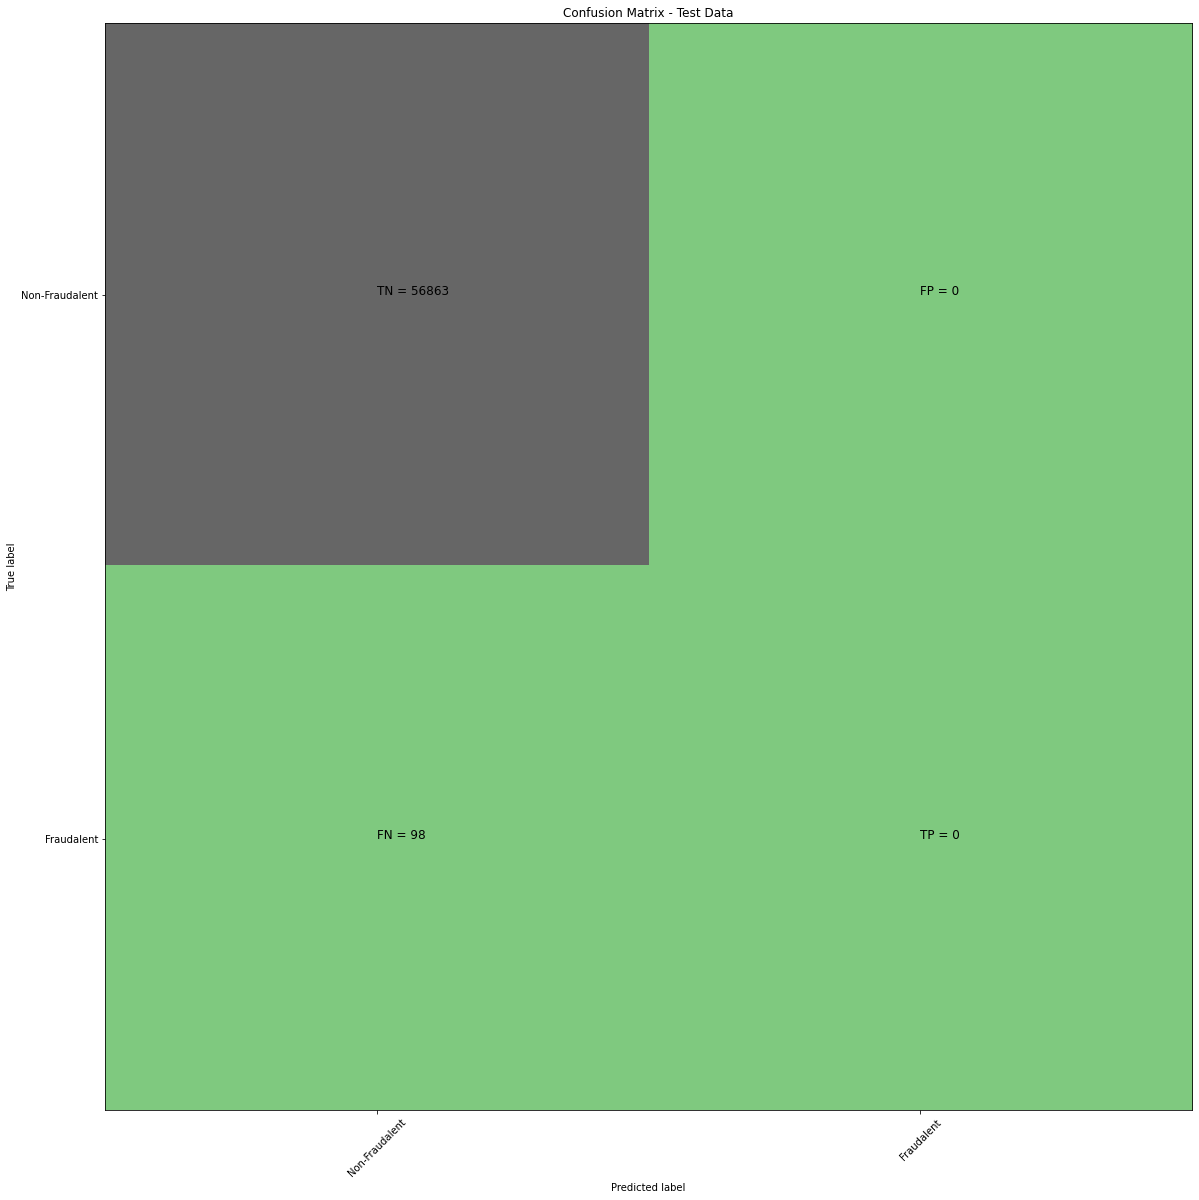

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9755188535854347
l2 threshold: 0.626697156847277
ROC for the test dataset 97.6%


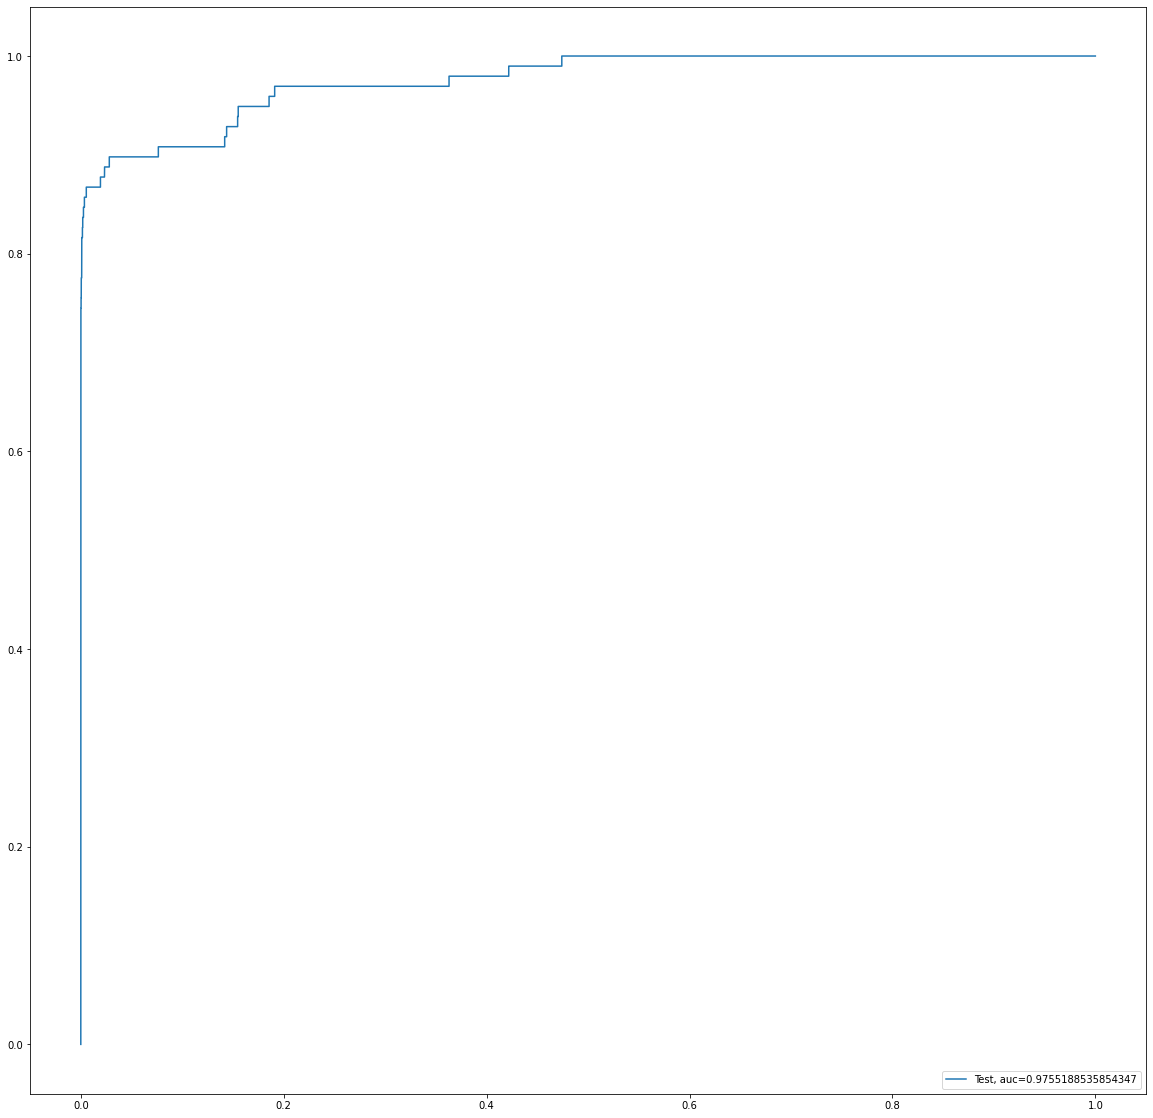

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


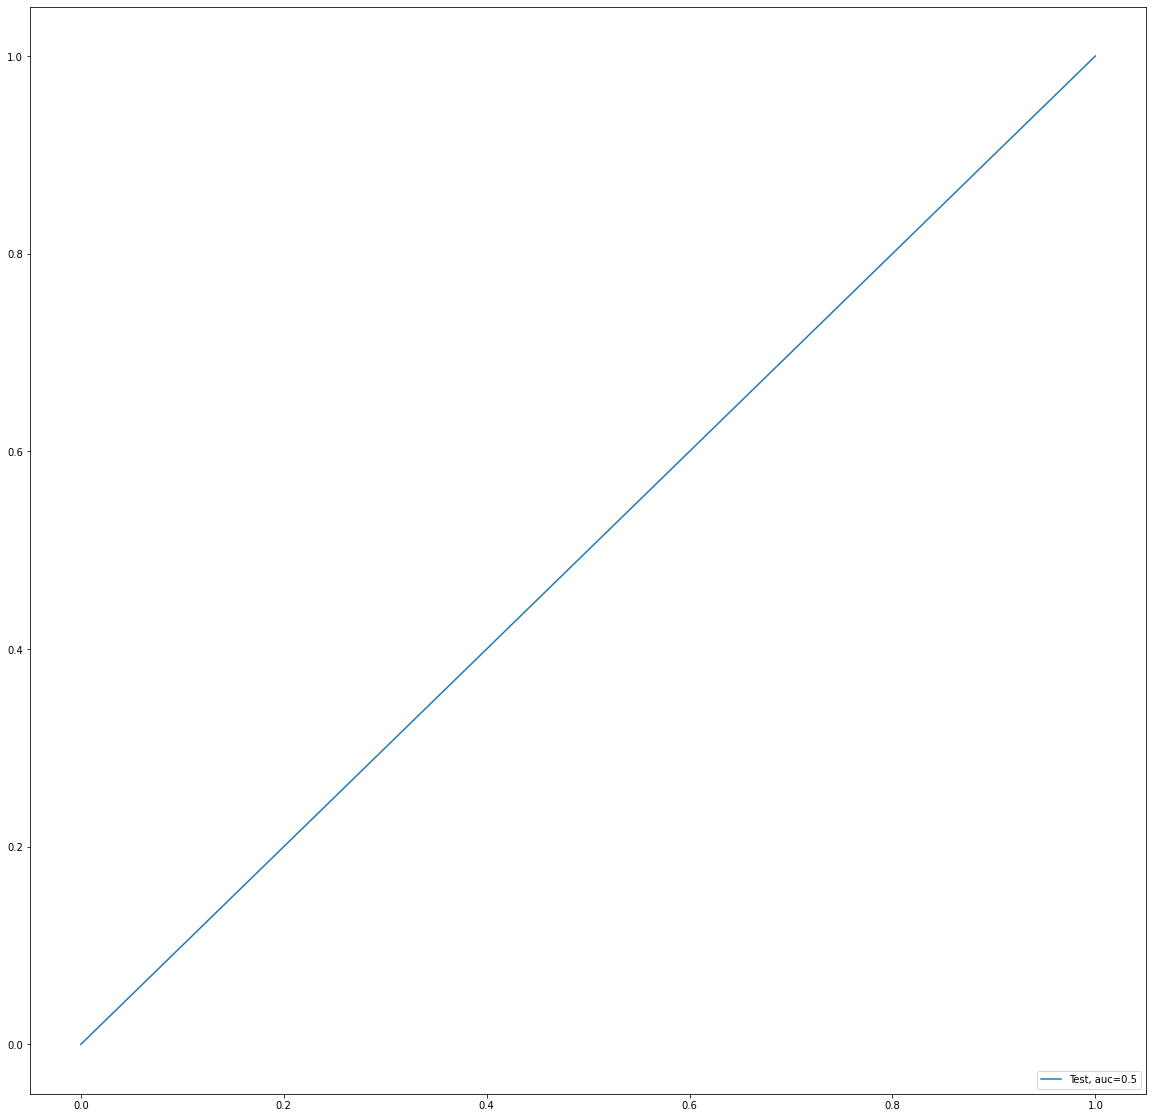

Time Taken by Model: --- 542.7748675346375 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9958041466968628
Confusion Matrix


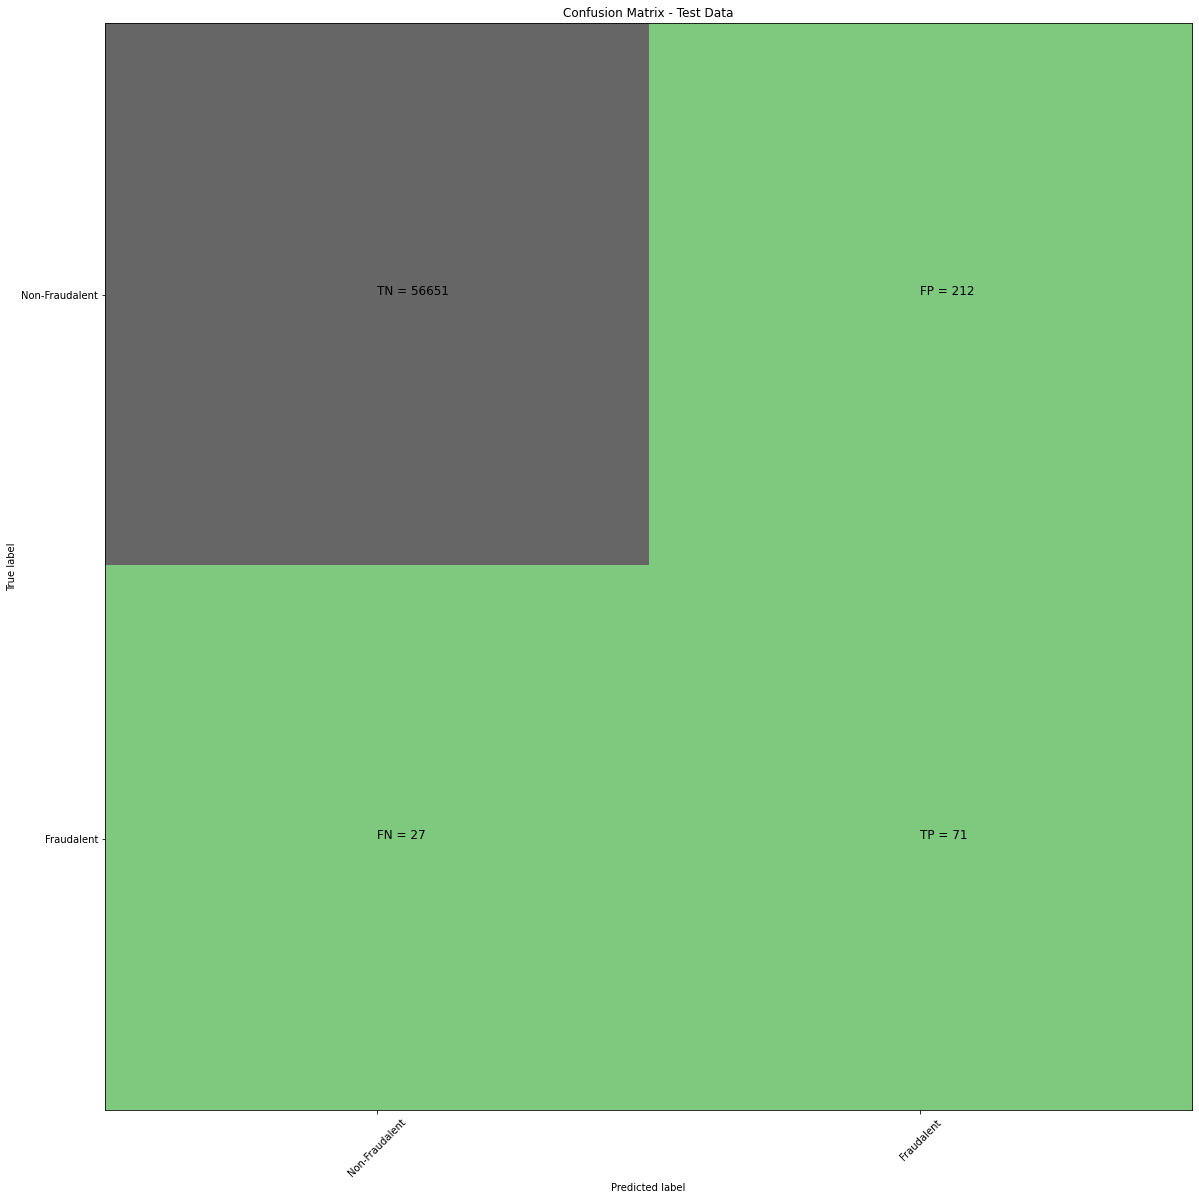

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711318144900364
KNN threshold: 0.2
ROC for the test dataset 87.1%


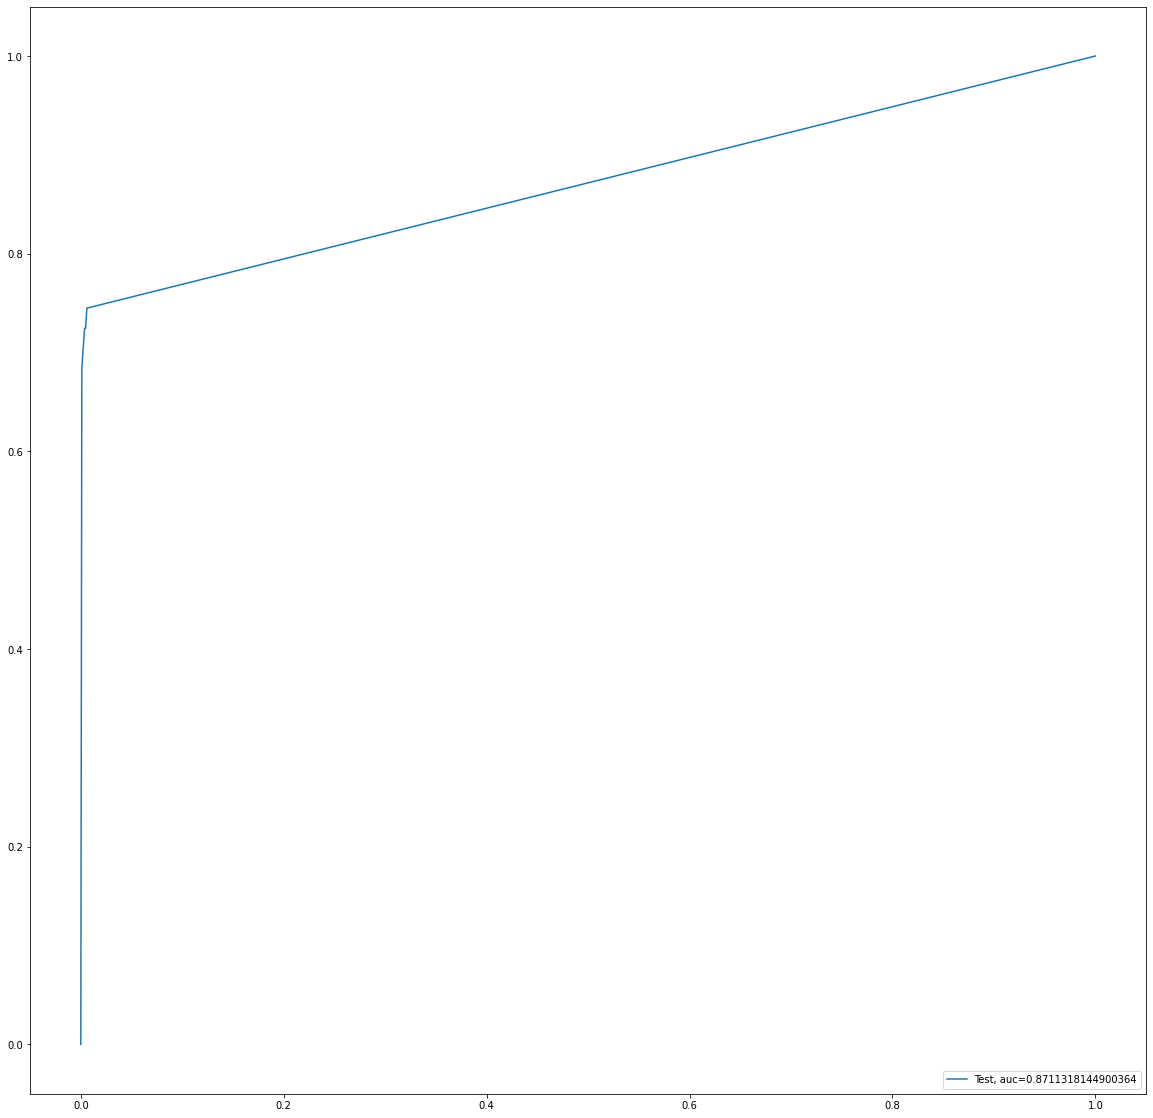

Time Taken by Model: --- 123.68153357505798 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979810747704569
Confusion Matrix


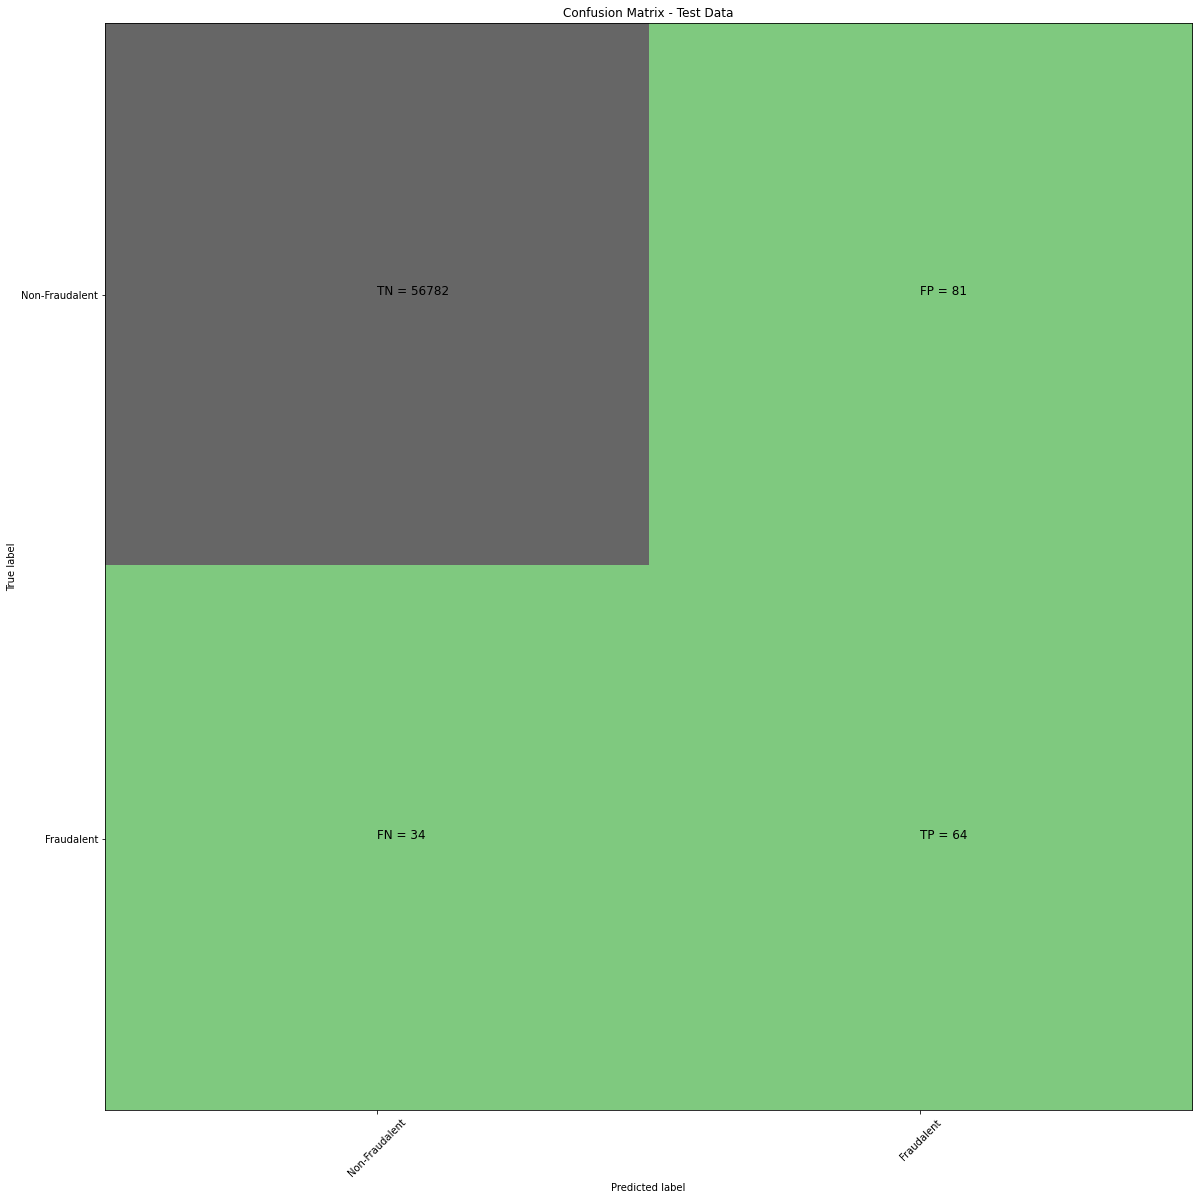

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.53        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258183740583793
Tree threshold: 1.0
ROC for the test dataset 82.6%


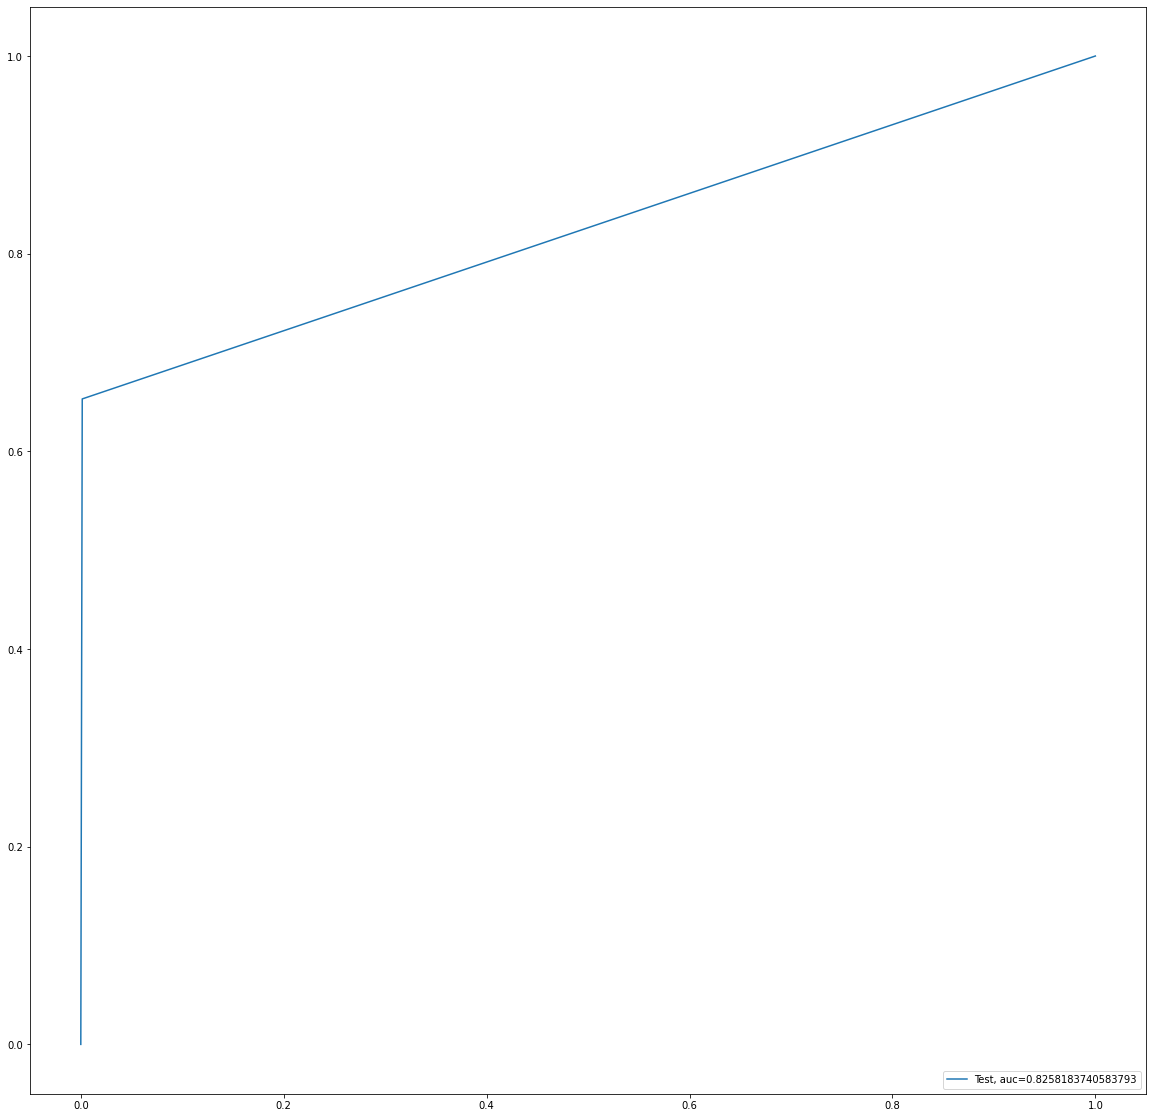

entropy score: 0.9985077509172943
Confusion Matrix


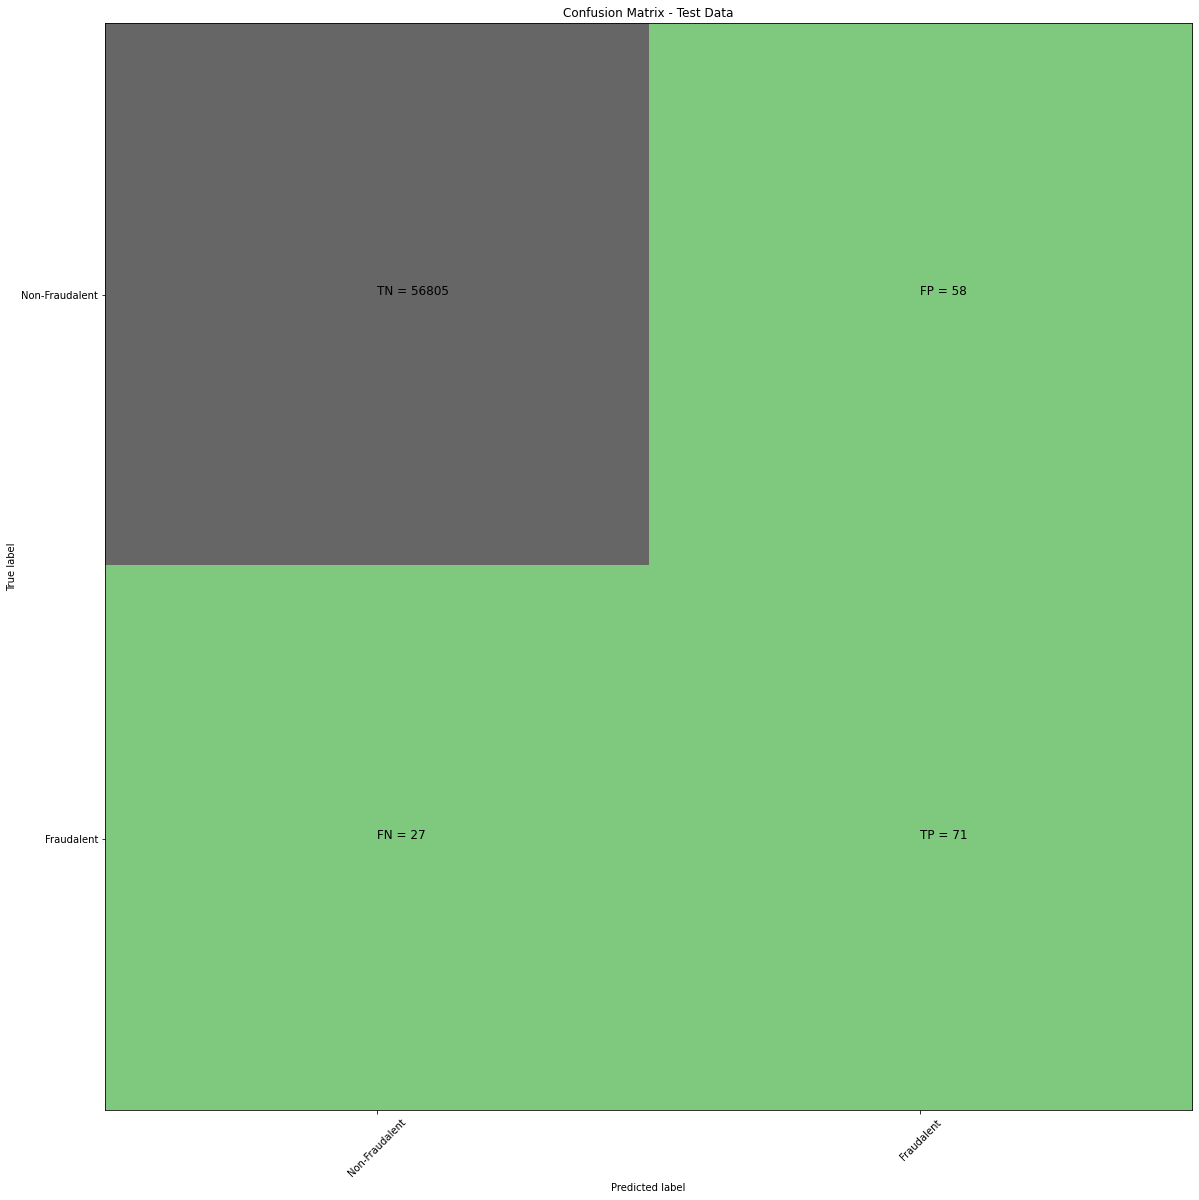

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.55      0.72      0.63        98

    accuracy                           1.00     56961
   macro avg       0.77      0.86      0.81     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8617349002453804
Tree threshold: 1.0
ROC for the test dataset 86.2%


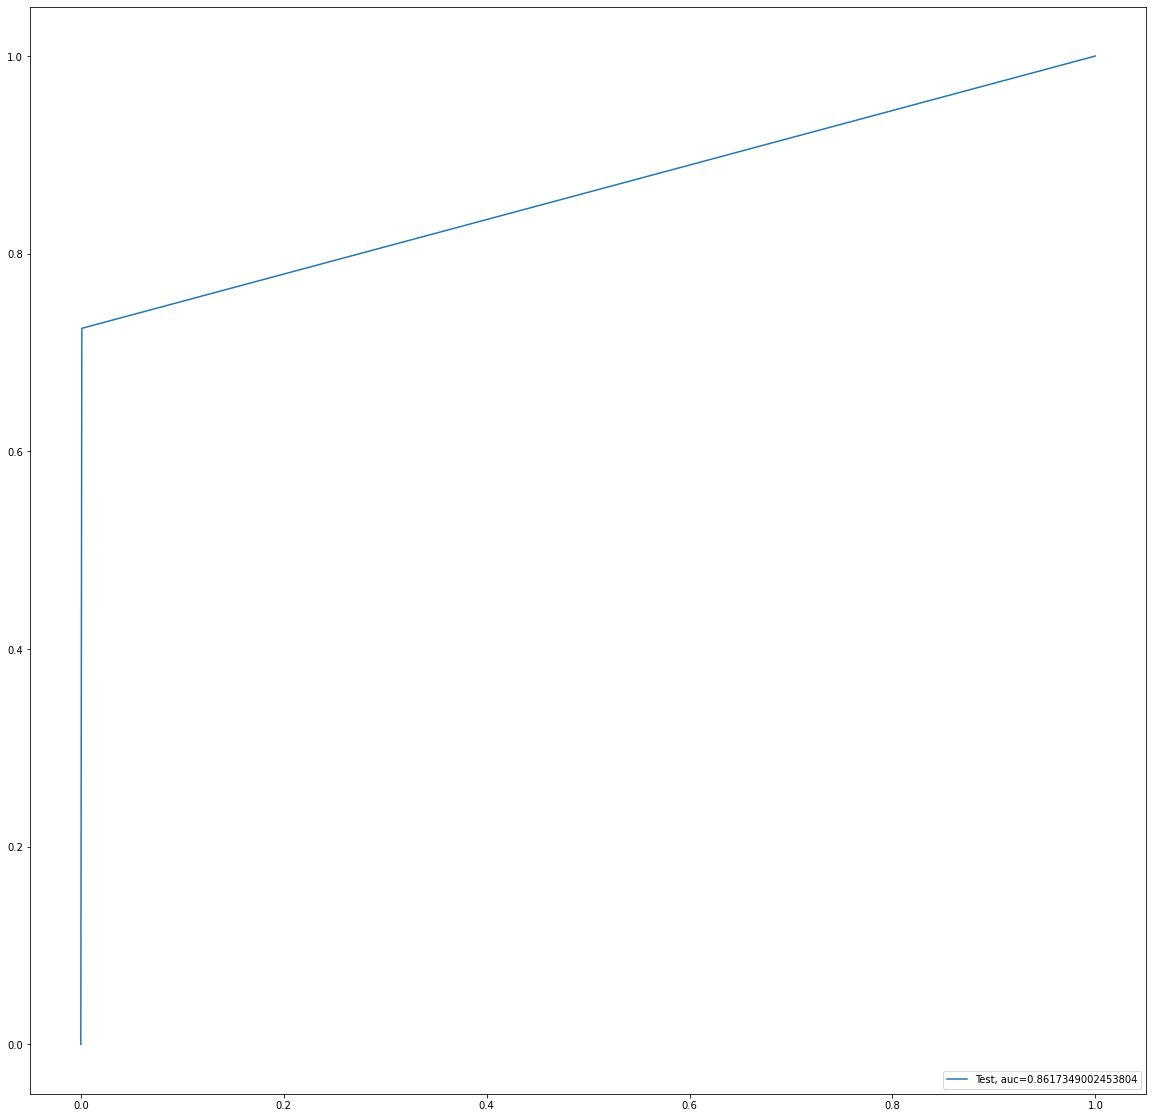

Time Taken by Model: --- 66.77797603607178 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


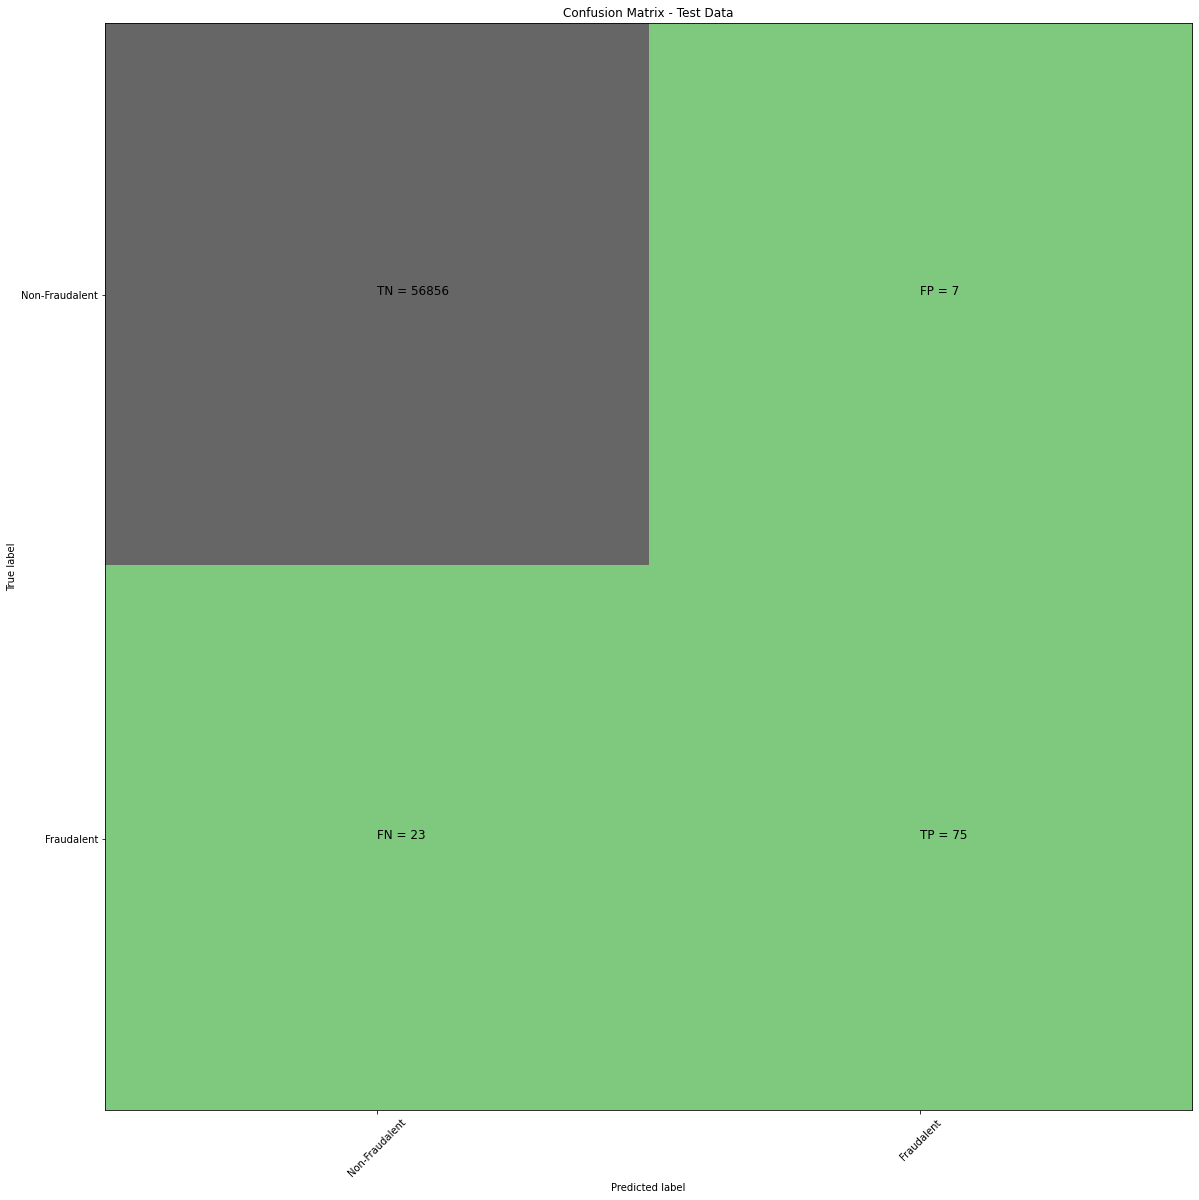

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9573326437656996
Random Forest threshold: 0.03
ROC for the test dataset 95.7%


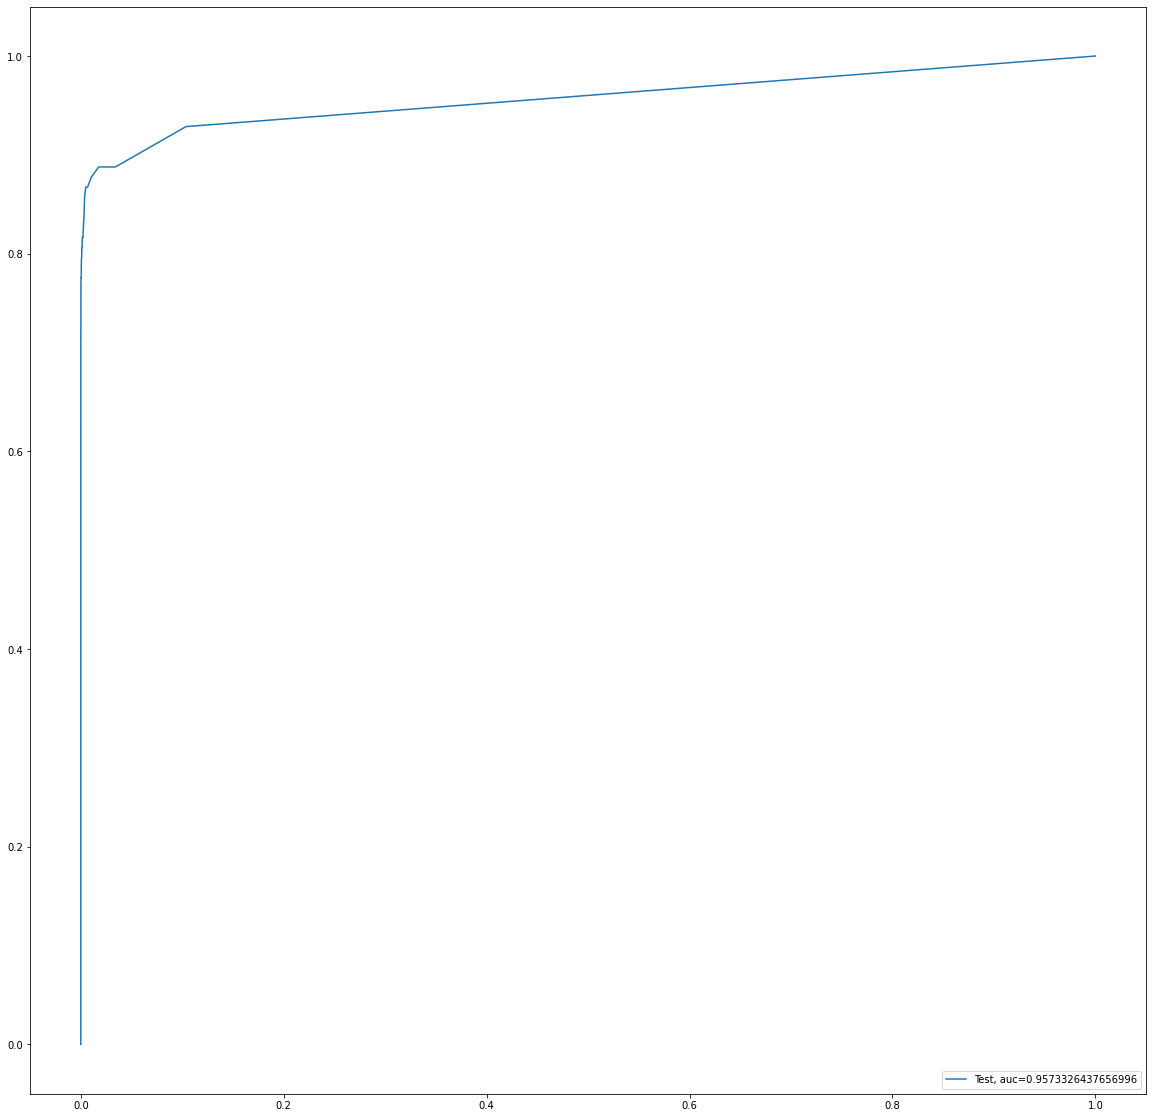

Time Taken by Model: --- 307.1208221912384 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9851126209160653
Confusion Matrix


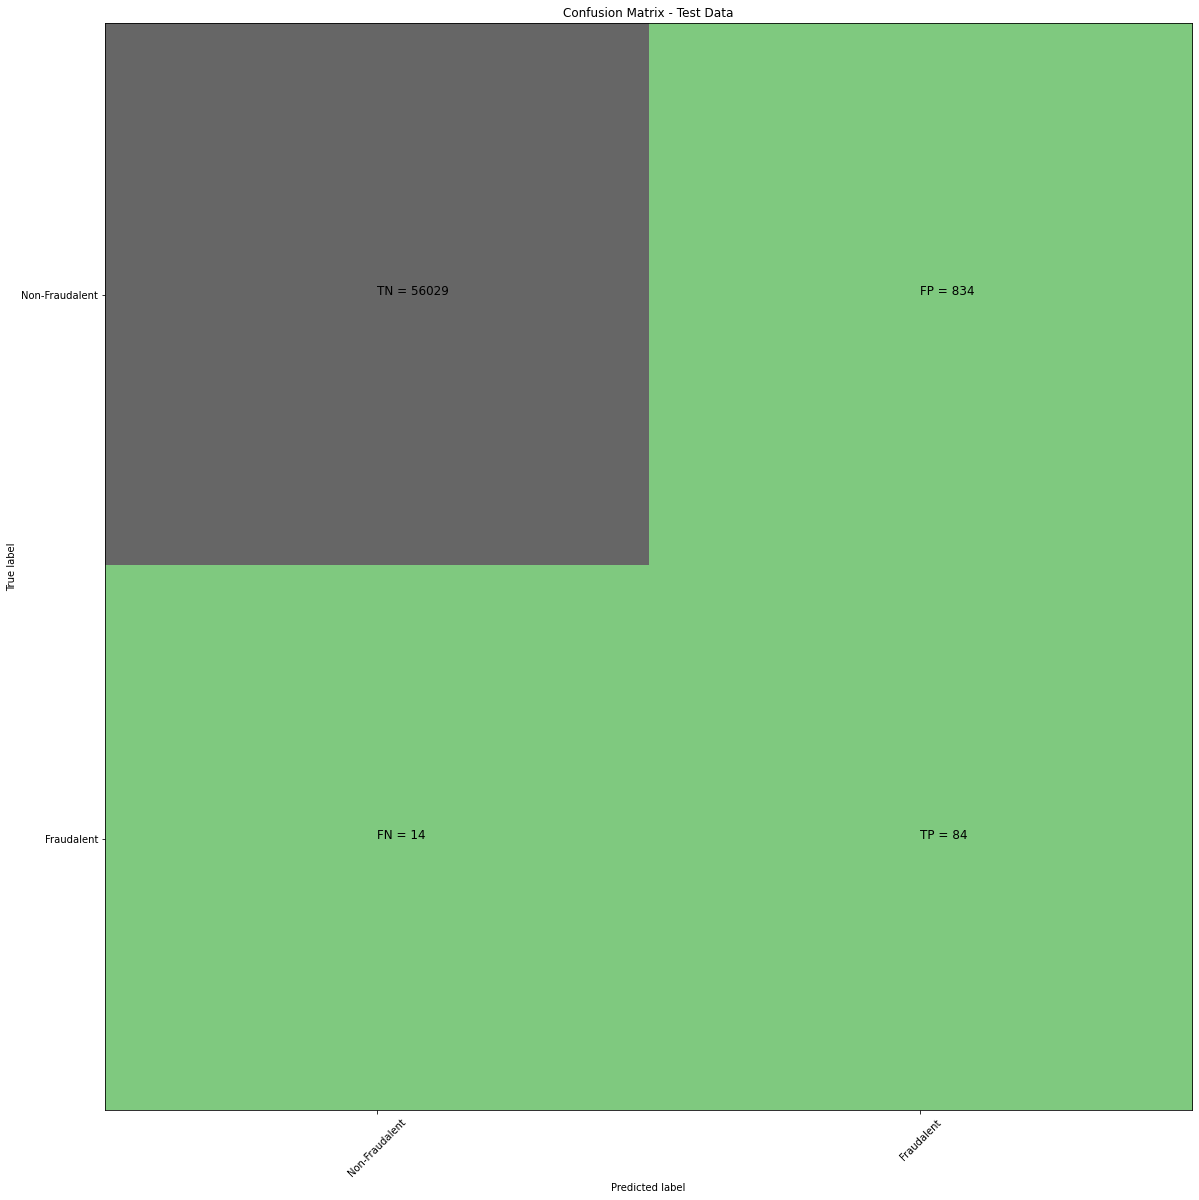

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961

XGboost roc_value: 0.9818415152495059
XGBoost threshold: 0.45126739144325256
ROC for the test dataset 98.2%


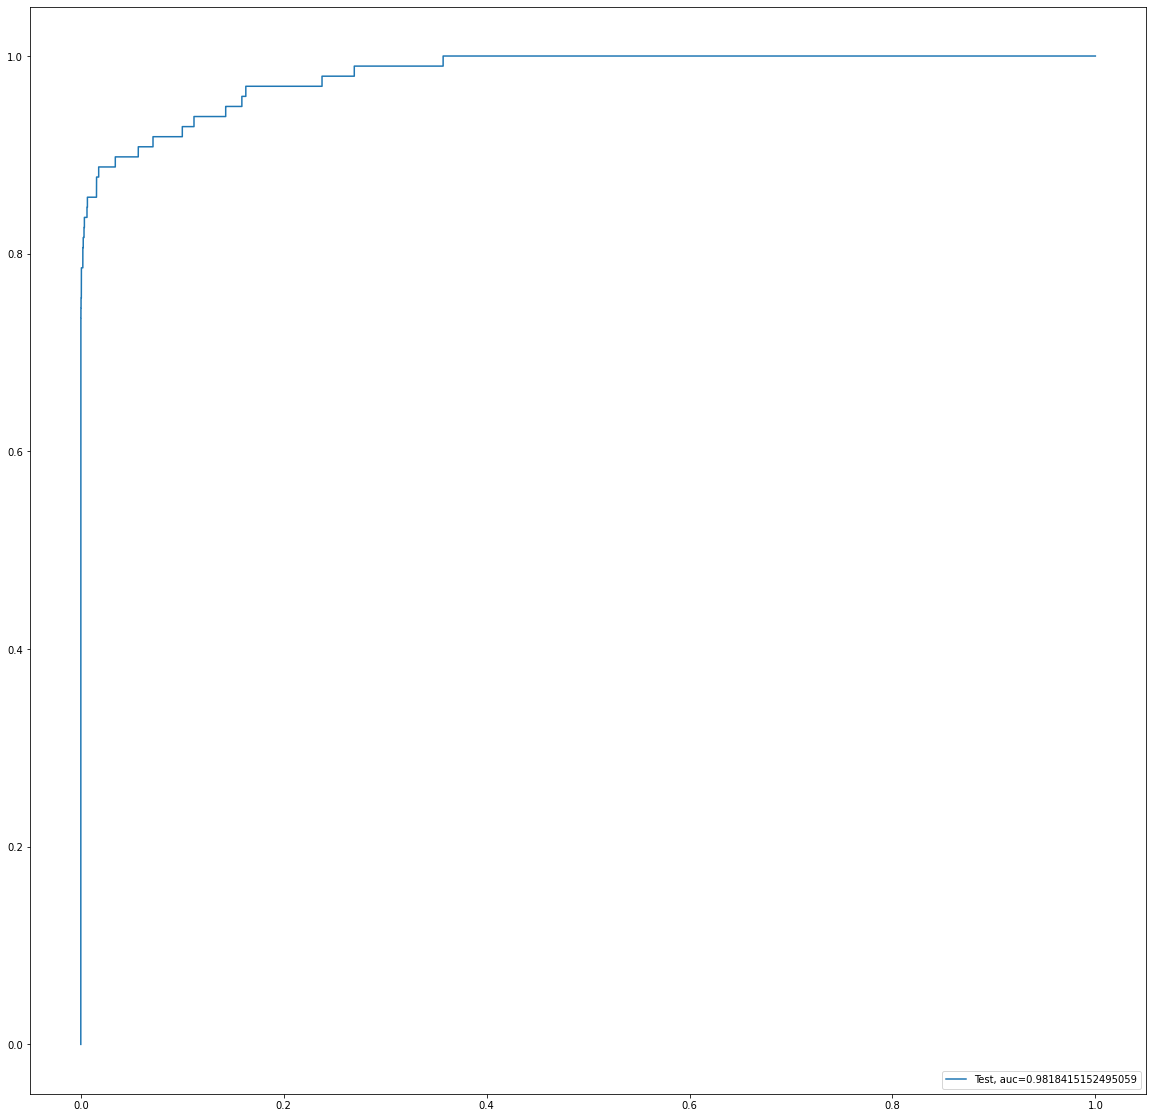

Time Taken by Model: --- 95.61846423149109 seconds ---
--------------------------------------------------------------------------------


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
plt.rcParams['figure.figsize'] = [10, 5]
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
plt.rcParams['figure.figsize'] = [10, 5]
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
plt.rcParams['figure.figsize'] = [10, 5]
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
plt.rcParams['figure.figsize'] = [10, 5]
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.999087,0.980827,0.003116
1,Power Transformer,Logistic Regression with L1 Regularisation,0.999122,0.980365,0.009521
2,Power Transformer,KNN,0.999544,0.938654,0.200000
3,Power Transformer,Tree Model with gini criteria,0.999070,0.887483,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999210,0.892646,1.000000
5,Power Transformer,Random Forest,0.999579,0.952608,0.010000
6,Power Transformer,XGBoost,0.999579,0.974716,0.001583
7,Power Transformer,SVM,0.998771,0.853544,0.000306
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.989311,0.003005
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998789,0.914237,0.025987


## Results for ADASYN Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

### But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

## Parameter Tuning for Final Model by Handling class imbalance

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9965766050455575
XGboost roc_value: 0.9810984116137353
XGBoost threshold: 0.17996612191200256


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [ ]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_